# **Effects of rainfall on groundwater level based on usage population and climatic condition**

### Problem Statement
Groundwater resources are critical for sustaining agricultural, industrial, and domestic activities. However, their availability is influenced by rainfall patterns, population usage, and climatic conditions, which vary significantly across regions. The objective of this study is to analyze the effects of rainfall, population usage, and climatic conditions on groundwater levels and to predict the **Net Ground Water Availability** for future use. This research employs machine learning models, such as Random Forest, Gradient Boost Regressor, and Linear Regression, complemented by Explainable AI techniques like SHAP and LIME to ensure transparent and interpretable predictions. By leveraging historical data on groundwater recharge, extraction, and allocation patterns, the study aims to provide actionable insights for sustainable groundwater management.

---

### Objectives
1. Analyze the relationship between rainfall patterns and groundwater recharge during monsoon and non-monsoon seasons.
2. Evaluate the impact of population-driven water usage on groundwater depletion.
3. Develop predictive models to forecast **Net Ground Water Availability** using machine learning algorithms.
4. Incorporate Explainable AI methods to ensure transparency and interpretability in predictions.
5. Provide actionable insights for policymakers to optimize groundwater resource planning and management.

---

### Constraints
1. Data variability due to climatic changes across regions may affect model accuracy.
2. Population growth and urbanization trends introduce uncertainty in future groundwater usage predictions.
3. Model performance depends on the availability and quality of historical data for training.
4. Regional disparities in rainfall and extraction rates may require localized model adjustments.
5. Ensuring interpretability in predictions while maintaining high accuracy can be challenging.

# **Loading the data and importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Dynamic_2017_2_0.csv')

In [3]:
df.shape

(689, 16)

In [4]:
df.sample(10)

S.no.      Name of State       Name of District  \
544    545          TELANGANA                Khammam   
97      98        CHATTISGARH              Balrampur   
301    302      MADHYAPRADESH                  Damoh   
435    436             ODISHA             Mayurbhanj   
650    651        UTTARAKHAND               Haridwar   
242    243          JHARKHAND  Saraikela - Kharsawan   
117    118        CHATTISGARH                 Raipur   
13      14  ARUNACHAL PRADESH                  Anjaw   
278    279             KERALA                 Kannur   
356    357        MAHARASHTRA                 Nagpur   

     Recharge from rainfall During Monsoon Season  \
544                                      38183.81   
97                                       47125.34   
301                                      29884.61   
435                                      88553.02   
650                                      25973.20   
242                                      12283.03   
117                                      20050.78   
13                                            NaN   
278                                      38938.74   
356                                      66817.65   

     Recharge from other sources During Monsoon Season  \
544                                            4736.40   
97                                             1471.44   
301                                            2032.92   
435                                           20433.95   
650                                           31267.84   
242                                             363.38   
117                                           10717.93   
13                                                 NaN   
278                                               0.00   
356                                            6221.47   

     Recharge from rainfall During Non Monsoon Season  \
544                                          10959.93   
97                                            4687.57   
301                                              0.00   
435                                          18391.08   
650                                           4735.00   
242                                            968.91   
117                                            626.47   
13                                                NaN   
278                                              0.00   
356                                           2587.51   

     Recharge from other sources During Non Monsoon Season  \
544                                           10349.66       
97                                             3158.93       
301                                            8963.43       
435                                           23645.41       
650                                           38362.17       
242                                            1443.75       
117                                           11424.75       
13                                                 NaN       
278                                            6899.83       
356                                           19143.00       

     Total Annual Ground Water Recharge  Total Natural Discharges  \
544                            64229.79                   5343.77   
97                             56443.28                   5176.26   
301                            40880.96                   2597.49   
435                           151023.46                   9470.29   
650                           100338.21                   5016.00   
242                            15059.07                   1505.91   
117                            42819.93                   4108.58   
13                                  NaN                       NaN   
278                            45838.56                   4583.85   
356                            94769.63                   5165.10   

     Annual Extractable Ground Water Resource  \
544                                  58886.02

# **Exploratory Data Analysis**

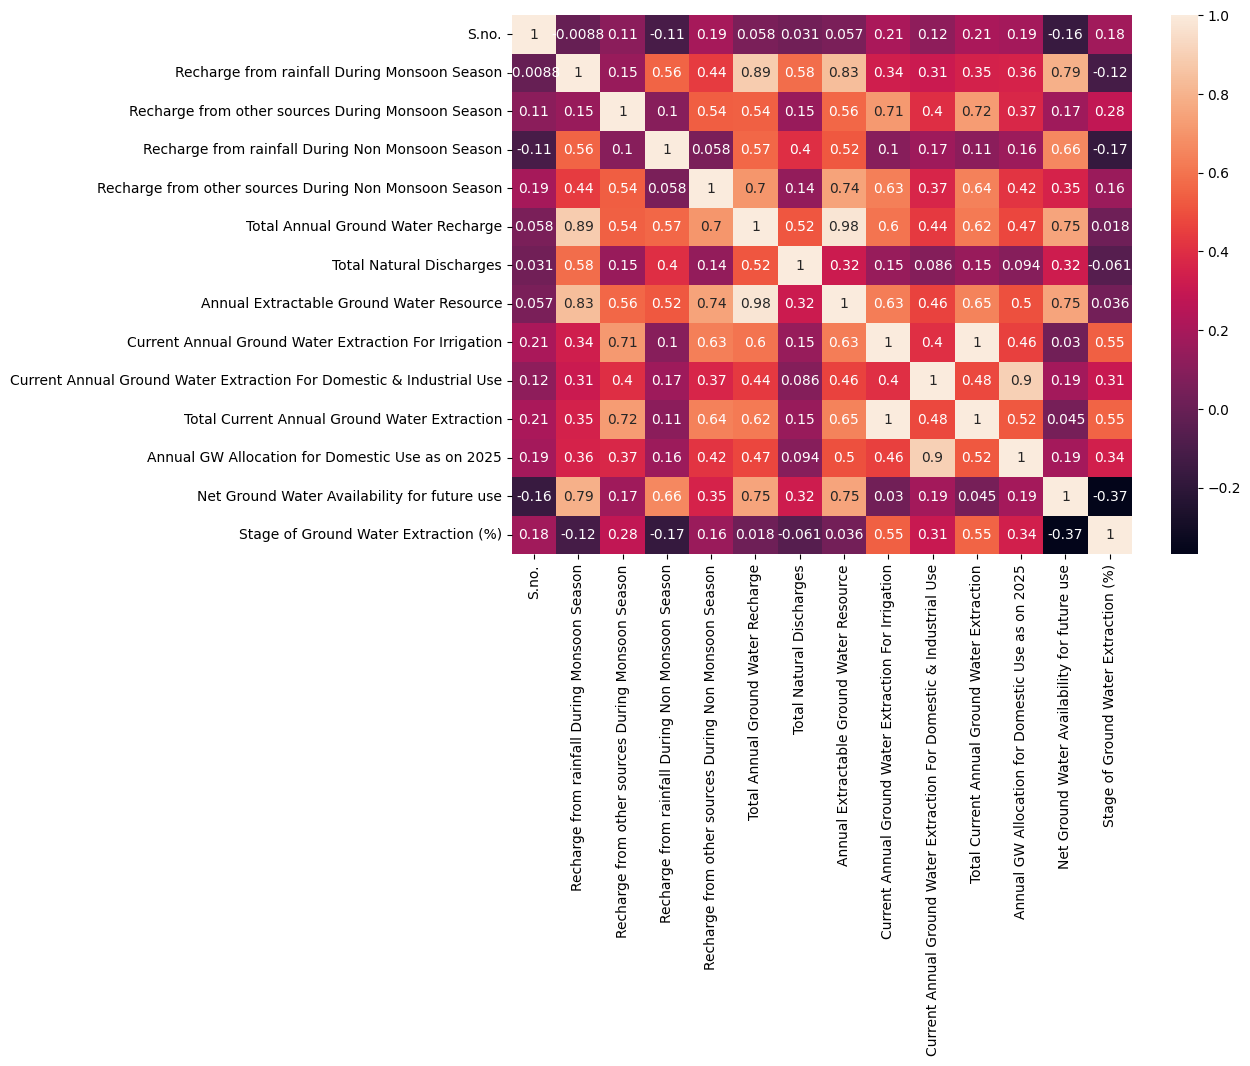

In [5]:
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)

# Calculate correlation matrix for numeric columns
corr_matrix = numeric_df.corr()

# Generate heatmap
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True)
plt.show()



**Heatmap of Correlation:**
   - The heatmap visualizes the correlations between various features in the dataset. Strong correlations can indicate potential predictors for groundwater availability, such as "Recharge from Rainfall" and "Total Annual Ground Water Recharge."
   - Weakly correlated variables may have less impact on predicting groundwater availability.



In [6]:
#Get information on the columns, null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   S.no.                                                                 689 non-null    int64  
 1   Name of State                                                         689 non-null    object 
 2   Name of District                                                      689 non-null    object 
 3   Recharge from rainfall During Monsoon Season                          684 non-null    float64
 4   Recharge from other sources During Monsoon Season                     684 non-null    float64
 5   Recharge from rainfall During Non Monsoon Season                      684 non-null    float64
 6   Recharge from other sources During Non Monsoon Season                 684 non-null    float64
 7  

 **Dataset Information:**
   - The dataset contains 689 entries and 15 columns. There are some missing values in columns related to groundwater recharge and extraction (5 entries missing in specific columns).
   - It's essential to handle these missing values for accurate modeling.





### Feature Descriptions:

1. **Name of State**:
   - Description: The name of the state to which the data pertains.
   - Data Type: Categorical
   - Example: Andhra Pradesh, Maharashtra, etc.

2. **Name of District**:
   - Description: The district within the state where the groundwater data was collected.
   - Data Type: Categorical
   - Example: Guntur, Pune, etc.

3. **Total Annual Ground Water Recharge**:
   - Description: The total amount of groundwater recharge occurring annually in a specific region.
   - Data Type: Numerical (Float)
   - Unit: Million Cubic Meters (MCM)
   - Example: 250.5

4. **Total Current Annual Ground Water Extraction**:
   - Description: The total amount of groundwater extracted annually for various uses such as domestic, industrial, and agricultural purposes.
   - Data Type: Numerical (Float)
   - Unit: Million Cubic Meters (MCM)
   - Example: 180.3

5. **Net Ground Water Availability for Future Use**:
   - Description: The groundwater available for future usage after accounting for the current extraction and other commitments.
   - Data Type: Numerical (Float)
   - Unit: Million Cubic Meters (MCM)
   - Example: 70.2

6. **Stage of Ground Water Extraction (%)**:
   - Description: The percentage of groundwater extracted relative to the recharge potential.
   - Data Type: Numerical (Percentage)
   - Example: 75%

7. **Recharge from Rainfall During Monsoon Season**:
   - Description: The contribution of rainfall during the monsoon season to groundwater recharge.
   - Data Type: Numerical (Float)
   - Unit: Million Cubic Meters (MCM)
   - Example: 150.4

8. **Recharge from Rainfall During Non-Monsoon Season**:
   - Description: The contribution of rainfall during the non-monsoon season to groundwater recharge.
   - Data Type: Numerical (Float)
   - Unit: Million Cubic Meters (MCM)
   - Example: 50.6

9. **Recharge from Other Sources**:
   - Description: Groundwater recharge from other sources such as canals, rivers, and ponds.
   - Data Type: Numerical (Float)
   - Unit: Million Cubic Meters (MCM)
   - Example: 20.7

10. **Annual GW Allocation for Domestic Use as on 2025**:
    - Description: The projected allocation of groundwater for domestic use by 2025.
    - Data Type: Numerical (Float)
    - Unit: Million Cubic Meters (MCM)
    - Example: 30.2

11. **Future Industrial Demand for Ground Water**:
    - Description: The projected groundwater demand for industrial purposes in the future.
    - Data Type: Numerical (Float)
    - Unit: Million Cubic Meters (MCM)
    - Example: 15.4

12. **Irrigation Potential Created**:
    - Description: The irrigation potential developed due to groundwater usage.
    - Data Type: Numerical (Float)
    - Unit: Hectares
    - Example: 1000

---

### Summary:
- **Key Metrics**: Total recharge, extraction, availability, and stage of extraction provide insights into groundwater management.
- **Categorical Variables**: States and districts help identify spatial patterns.
- **Seasonal Factors**: Contributions from monsoon and non-monsoon rainfall help understand seasonal dependencies.
- **Projections**: Future allocations and industrial demand support planning.



In [7]:
df.isna().sum()

S.no.                                                                   0
Name of State                                                           0
Name of District                                                        0
Recharge from rainfall During Monsoon Season                            5
Recharge from other sources During Monsoon Season                       5
Recharge from rainfall During Non Monsoon Season                        5
Recharge from other sources During Non Monsoon Season                   5
Total Annual Ground Water Recharge                                      5
Total Natural Discharges                                                5
Annual Extractable Ground Water Resource                                5
Current Annual Ground Water Extraction For Irrigation                   5
Current Annual Ground Water Extraction For Domestic & Industrial Use    0
Total Current Annual Ground Water Extraction                            5
Annual GW Allocation for Domestic Use 

 **Null Value Count:**
   - Displays the count of missing values for each column. For instance, columns like "Recharge from Rainfall During Monsoon Season" and "Total Annual Ground Water Recharge" have 5 missing values that need imputation.



In [8]:
#statewise groundwater reserve
state_list = []
total_frnd_water_recharge = []
curr_gw_extr_list = []
future_available_GW_list = []
#Net Ground Water Availability for future use

for state, subset in df.groupby('Name of State'):
    #print(state, sum(subset['Net Ground Water Availability for future use']))
    state_list.append(state)
    total_frnd_water_recharge.append(sum(subset['Total Annual Ground Water Recharge']))
    curr_gw_extr_list.append(sum(subset['Total Current Annual Ground Water Extraction']))
    future_available_GW_list.append(sum(subset['Net Ground Water Availability for future use'])) 
dfnew = pd.DataFrame({"State":state_list, "GW_Recharge":total_frnd_water_recharge, "GW_Extraction": curr_gw_extr_list, "Future_GW_Available": future_available_GW_list})

### Total Rechage, Extraction, Future Availability and Annual Reserve by States in India

In [9]:
dfnew.sort_values(['GW_Recharge','GW_Extraction'], inplace= True)
dfnew['annual_reserve'] = dfnew['GW_Recharge']-dfnew['GW_Extraction']
dfnew

State  GW_Recharge  GW_Extraction  Future_GW_Available  \
10                   Diu       471.00         386.00                 6.00   
19           LAKSHADWEEP      1072.80         238.10               122.81   
9                  Daman      1304.00         635.00               480.00   
5             CHANDIGARH      4216.00        3378.00               416.00   
8   Dadra & Nagar Haveli      6861.59        2042.86              4475.73   
24               MIZORAM     21280.76         731.88             18092.91   
28            Puducherry     22633.18       15140.82              5473.84   
11                   GOA     26722.34        5371.36              6992.81   
7                  DELHI     32100.02       35990.29              2299.43   
0             A&N ISLAND     36841.83         908.17             32131.52   
22               MANIPUR     42991.50         556.86             34290.53   
14              HIMACHAL     50576.83       39311.93             16444.25   
33               TRIPURA    152568.37        9759.24            111249.36   
23             MEGHALAYA    183132.59        3739.54            159096.77   
25              NAGALAND    220443.18        1960.12            196308.27   
15                   J&K    289008.60       75674.34            184433.39   
34           UTTARAKHAND    304495.92      164382.46            124890.45   
30                SIKKIM    563216.75          87.40            150728.28   
18                KERALA    576923.21      267064.39            241449.10   
16             JHARKHAND    621342.87      157773.29            412800.47   
13               HARYANA   1014500.05     1250038.64             87367.91   
6            CHATTISGARH   1157241.10      469527.41            576373.37   
29             RAJASTHAN   1320537.64     1677050.87             88012.78   
32             TELANGANA   1361897.09      809396.05            426060.85   
26                ODISHA   1673807.67      656766.50            884649.93   
17             KARNATAKA   1683850.45     1033652.36            541171.47   
31             TAMILNADU   2022412.43     1473180.42            565688.62   
1         ANDHRA PRADESH   2121785.20      889703.22           1231396.30   
12               GUJARAT   2236858.46     1357724.37            797646.84   
27                PUNJAB   2393078.47     3578235.76            108919.83   
3                  ASSAM   2867207.67      272808.75           2142976.56   
36           WEST BENGAL   2933213.97     1184428.50           1418882.55   
4                  BIHAR   3141397.82     1326418.38           1578245.42   
21           MAHARASHTRA   3163713.00     1633036.06           1291196.57   
20         MADHYAPRADESH   3642155.71     1887866.06           1584187.84   
35          UTTARPRADESH   6991996.40     4584047.41           2036249.36   
2      ARUNACHAL PRADESH          NaN            NaN                  NaN   

    annual_reserve  
10           85.00  
19          834.70  
9           669.00  
5           838.00  
8          4818.73  
24        20548.88  
28         7492.36  
11        21350.98  
7         -3890.27  
0         35933.66  
22        42434.64  
14        11264.90  
33       142809.13  
23       179393.05  
25       218483.06  
15       213334.26  
34       140113.46  
30       563129.35  
18       309858.82  
16       463569.58  
13      -235538.59  
6        687713.69  
29      -356513.23  
32       552501.04  
26      1017041.17  
17       650198.09  
31       549232.01  
1       1232081.98  
12       879134.09  
27     -1185157.29  
3       2594398.92  
36      1748785.47  
4       1814979.44  
21      1530676.94  
20      1754289.65  
35      2407948.99  
2              NaN

 **State-wise Groundwater Reserves:**
   - A summary of total groundwater recharge, extraction, and future availability for each state is calculated.
   - A new DataFrame (`dfnew`) is created with these aggregated values.



### Annual Reserve of Ground water by states, Green bars indicate positive annual reserve, while Red value indicates negative annual reserve.

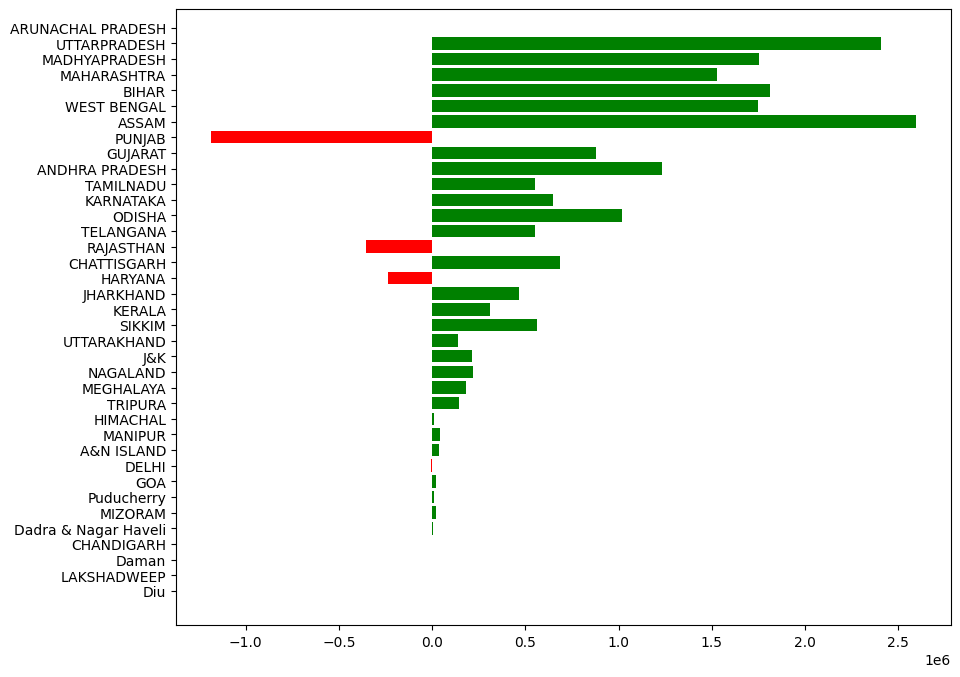

In [10]:
f, ax = plt.subplots(figsize=(10,8))
plt.barh(dfnew['State'],dfnew['annual_reserve'], color=(dfnew['annual_reserve']>0).map({True: 'g',False: 'r'}))
plt.show()

**Bar Chart of Annual Reserve:**
   - States are categorized based on their annual groundwater reserve. Positive reserves are shown in green, and deficits are in red.
   - This highlights states with groundwater deficits requiring immediate attention.



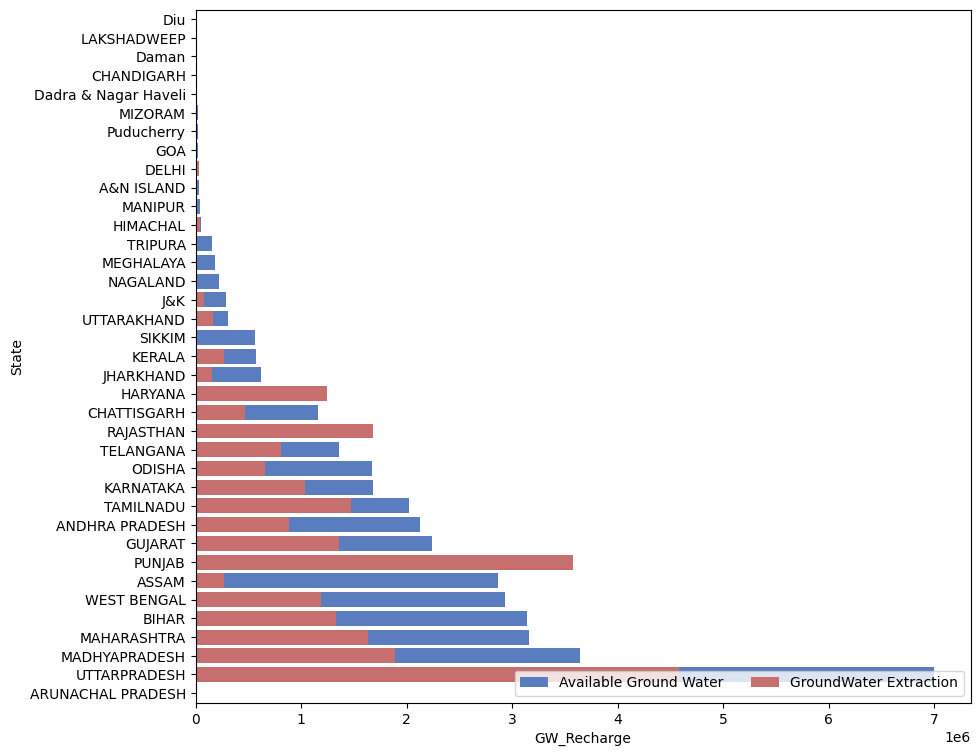

In [11]:
f, ax = plt.subplots(figsize=(10, 9))

sns.set_color_codes("muted")
sns.barplot(x='GW_Recharge', y= 'State', data = dfnew, label = 'Available Ground Water', color='b')
sns.barplot(x='GW_Extraction', y= 'State', data = dfnew, label = 'GroundWater Extraction', color='r')
ax.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

 **Groundwater Recharge vs Extraction:**
   - Visual comparison of groundwater recharge and extraction for each state.
   - States with higher extraction than recharge indicate overexploitation, as shown by the red bars exceeding the blue bars.



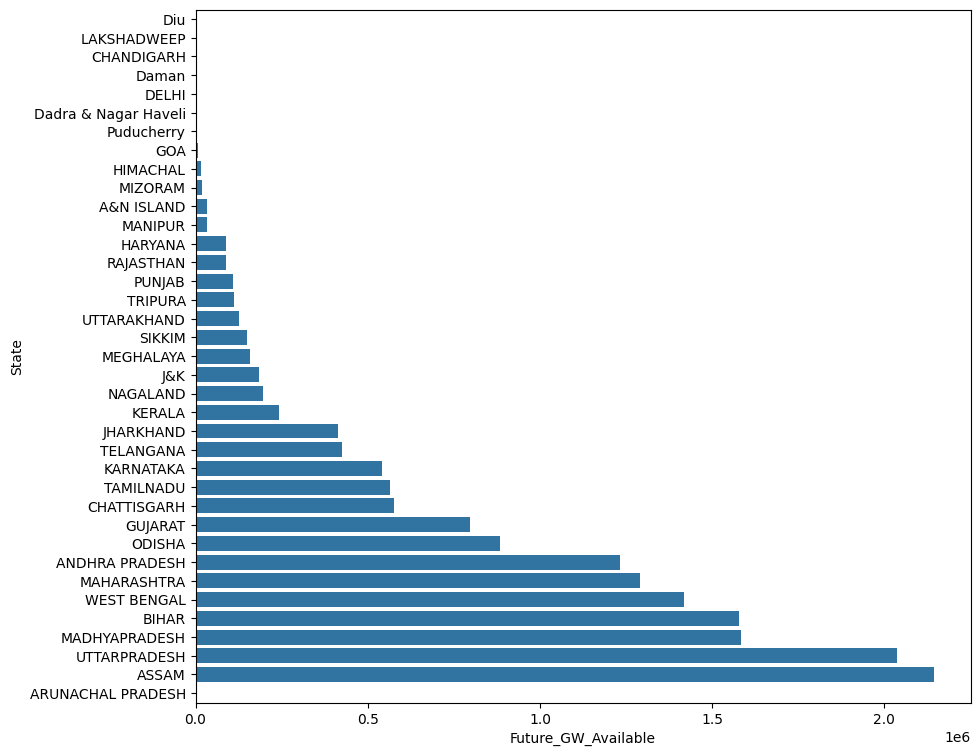

In [12]:
dfnew.sort_values('Future_GW_Available', inplace = True)
f, ax = plt.subplots(figsize=(10, 9))
sns.barplot(x='Future_GW_Available', y = 'State',data = dfnew)
plt.show()

 **Future Groundwater Availability:**
   - Sorted by the availability of groundwater for future use.
   - States with minimal future availability are highlighted, helping policymakers prioritize resource management.



In [13]:
dfnew.count()

State                  37
GW_Recharge            36
GW_Extraction          36
Future_GW_Available    36
annual_reserve         36
dtype: int64

In [14]:
df_westbengal = df[df['Name of State']=='WEST BENGAL']
df_westbengal.head()

S.no. Name of State  Name of District  \
653    654   WEST BENGAL        Coochbehar   
654    655   WEST BENGAL        Jalpaiguri   
655    656   WEST BENGAL        Darjeeling   
656    657   WEST BENGAL    Uttar Dinajpur   
657    658   WEST BENGAL  Dakshin Dinajpur   

     Recharge from rainfall During Monsoon Season  \
653                                     185334.09   
654                                     228086.62   
655                                      39186.21   
656                                      91467.43   
657                                      65504.74   

     Recharge from other sources During Monsoon Season  \
653                                            5143.37   
654                                            3939.51   
655                                               0.00   
656                                            7541.41   
657                                            6432.72   

     Recharge from rainfall During Non Monsoon Season  \
653                                          60379.13   
654                                          65301.46   
655                                          13052.71   
656                                          22166.67   
657                                          17257.72   

     Recharge from other sources During Non Monsoon Season  \
653                                           12100.71       
654                                           12078.29       
655                                               0.00       
656                                           24353.83       
657                                           18756.55       

     Total Annual Ground Water Recharge  Total Natural Discharges  \
653                           262957.30                  26295.71   
654                           309405.88                  30940.59   
655                            52238.92                   5223.89   
656                           145529.34                  12014.51   
657                           107951.73                   9115.64   

     Annual Extractable Ground Water Resource  \
653                                 236661.59   
654                                 278465.29   
655                                  47015.03   
656                                 133514.83   
657                                  98836.09   

     Current Annual Ground Water Extraction For Irrigation  \
653                                            42261.5       
654                                             8241.2       
655                                             1169.1       
656                                            78133.6       
657                                            50706.0       

     Current Annual Ground Water Extraction For Domestic & Industrial Use  \
653                                            4447.27                      
654                                            4395.75                      
655                                            1478.05                      
656                                            4811.27                      
657                                            2618.71                      

     Total Current Annual Ground Water Extraction  \
653                                      46708.77   
654                                      12636.95   
655                                       2647.15   
656                                      82944.87   
657                                      53324.71   

     Annual GW Allocation for Domestic Use as on 2025  \
653                                           5988.25   
654                                           5908.97   
655                                           2012.74   
656                                           7569.33   
657                                           3349.33   

     Net Ground Water Availability for future use  \
653                                     188411.84   
654                           

In [15]:
for state in list(df['Name of State'].unique()):
    print(state)

ANDHRA PRADESH
ARUNACHAL PRADESH
ASSAM
BIHAR
CHATTISGARH
DELHI
GOA
GUJARAT
HARYANA
HIMACHAL
J&K
JHARKHAND
KARNATAKA
KERALA
MADHYAPRADESH
MAHARASHTRA
MANIPUR
MEGHALAYA
MIZORAM
NAGALAND
ODISHA
PUNJAB
RAJASTHAN
SIKKIM
TAMILNADU
TELANGANA
TRIPURA
UTTARPRADESH
UTTARAKHAND
WEST BENGAL
A&N ISLAND
CHANDIGARH
Dadra & Nagar Haveli
Daman
Diu
LAKSHADWEEP
Puducherry


* ##### Annual Ground-water allocation estimated to the districts in West-Bengal. North-24_Parganas, Murshidabad and Burdwan are top 3 estimated districtics by Ground water allocation 

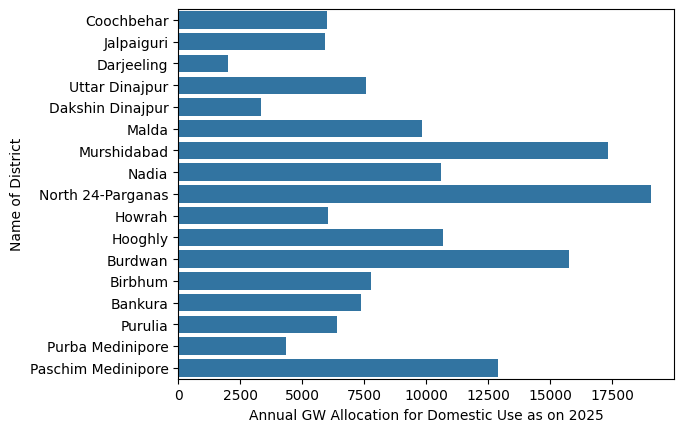

In [16]:

sns.barplot(x = 'Annual GW Allocation for Domestic Use as on 2025', y = 'Name of District', data = df[df['Name of State']=='WEST BENGAL'])
plt.show()

In [17]:
df_westbengal.sort_values('Stage of Ground Water Extraction (%)',ascending=False, inplace = True)
df_westbengal[['Name of State','Name of District','Stage of Ground Water Extraction (%)']].head(3)

C:\Users\0513\AppData\Local\Temp\ipykernel_18148\3959159747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_westbengal.sort_values('Stage of Ground Water Extraction (%)',ascending=False, inplace = True)


Name of State   Name of District  Stage of Ground Water Extraction (%)
660   WEST BENGAL              Nadia                                  92.0
659   WEST BENGAL        Murshidabad                                  87.0
661   WEST BENGAL  North 24-Parganas                                  66.0

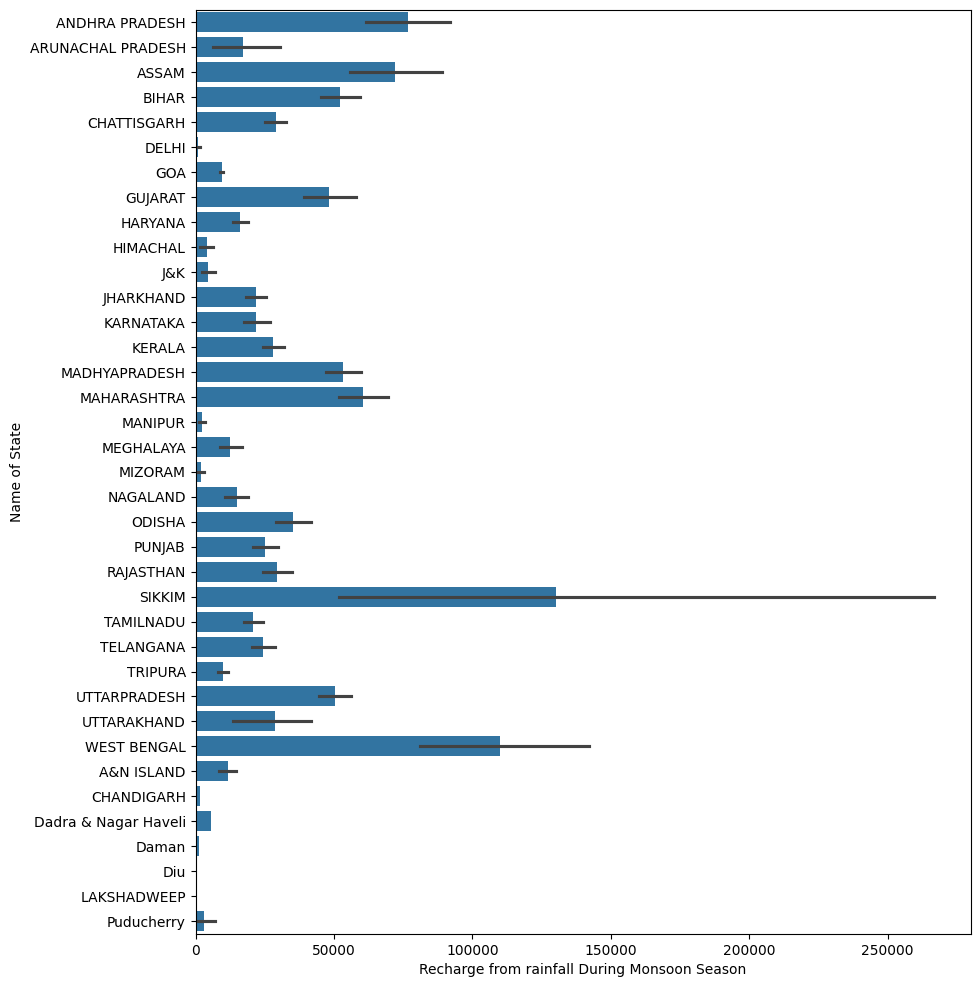

In [18]:
plt.figure(figsize=(10,12))
sns.barplot(x='Recharge from rainfall During Monsoon Season', y='Name of State', data = df)
plt.show()

#### State-wise Ground Water Extraction Distributions statistics. 

0 UTTARPRADESH
1 MADHYAPRADESH
2 BIHAR
3 MAHARASHTRA
4 GUJARAT
5 RAJASTHAN
6 TAMILNADU
7 TELANGANA
8 ODISHA
9 KARNATAKA
10 ASSAM
11 CHATTISGARH
12 JHARKHAND
13 J&K
14 HARYANA
15 PUNJAB
16 WEST BENGAL
17 ARUNACHAL PRADESH
18 KERALA
19 ANDHRA PRADESH
20 DELHI
21 NAGALAND
22 MEGHALAYA
23 MANIPUR
24 LAKSHADWEEP
25 TRIPURA
26 MIZORAM
27 HIMACHAL
28 UTTARAKHAND
29 SIKKIM
30 A&N ISLAND
31 Puducherry
32 GOA
33 CHANDIGARH
34 Dadra & Nagar Haveli
35 Daman


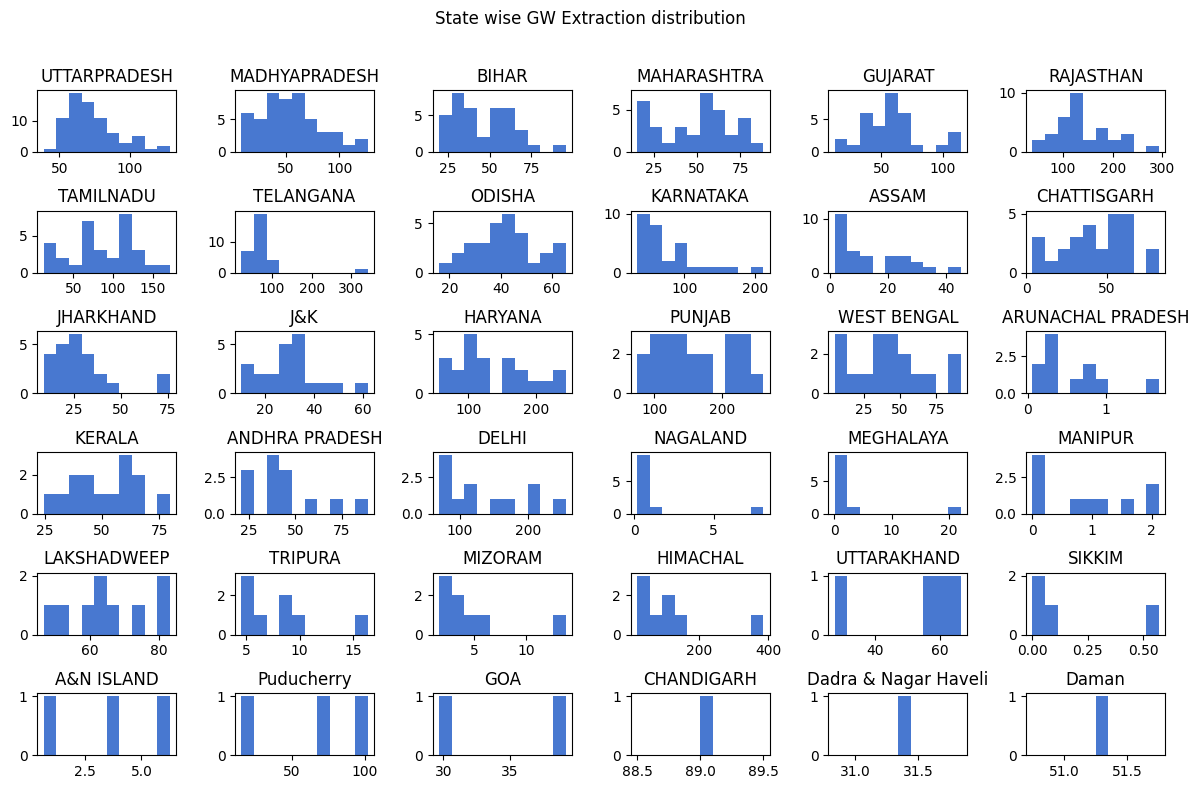

In [19]:
fig,axs = plt.subplots(6,6,figsize=(12,8))

for idx,state in enumerate(df['Name of State'].value_counts().sort_values(ascending=False)[0:36].index):
    print(idx,state)
    axs[idx//6,idx%6].hist(x = df[df['Name of State']==state]['Stage of Ground Water Extraction (%)'], color='b')
    axs[idx//6,idx%6].set_title(state)
plt.suptitle("State wise GW Extraction distribution")
plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

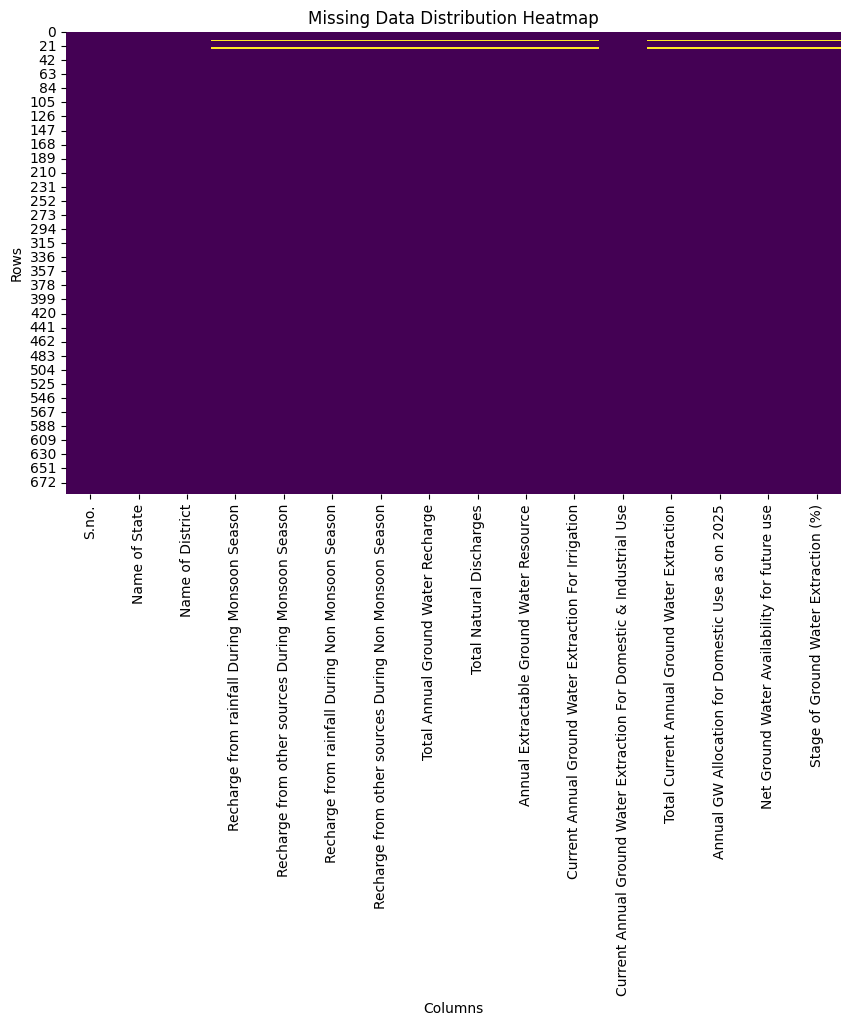

In [20]:
# Visualizing missing data using a heatmap with seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Distribution Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()




The heatmap above shows the distribution of missing data across the dataset:

- Each column corresponds to a feature in the dataset, and each row represents a record.
- Yellow stripes indicate missing values, while dark areas represent available data.
- It appears that missing values are present in specific columns like groundwater recharge and related metrics.



## **Bivariate Analysis**

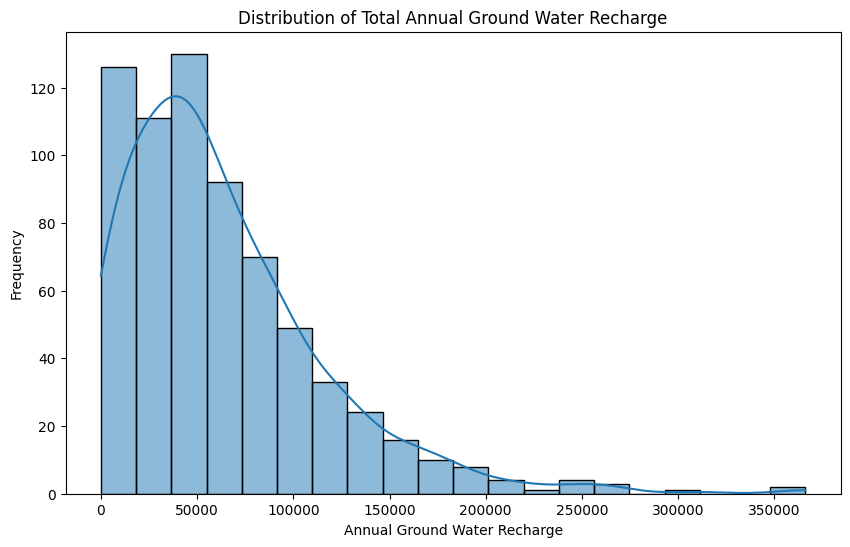

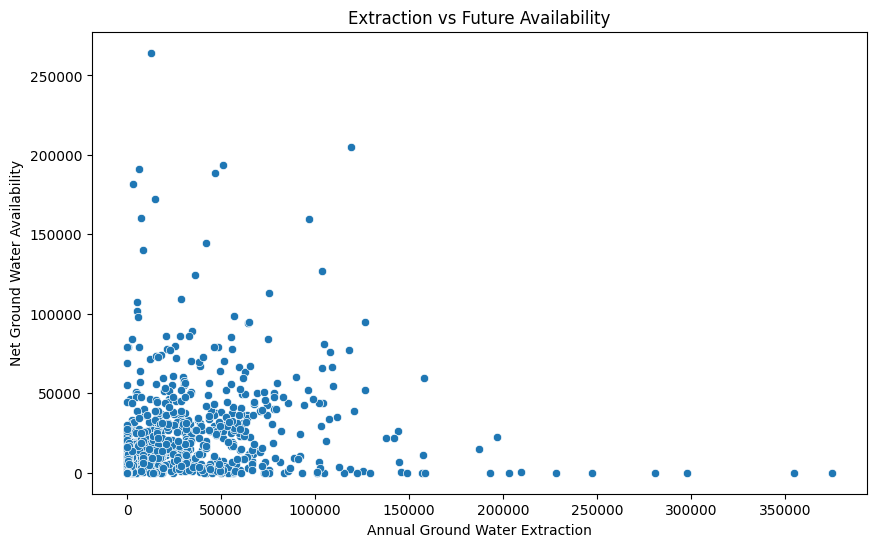

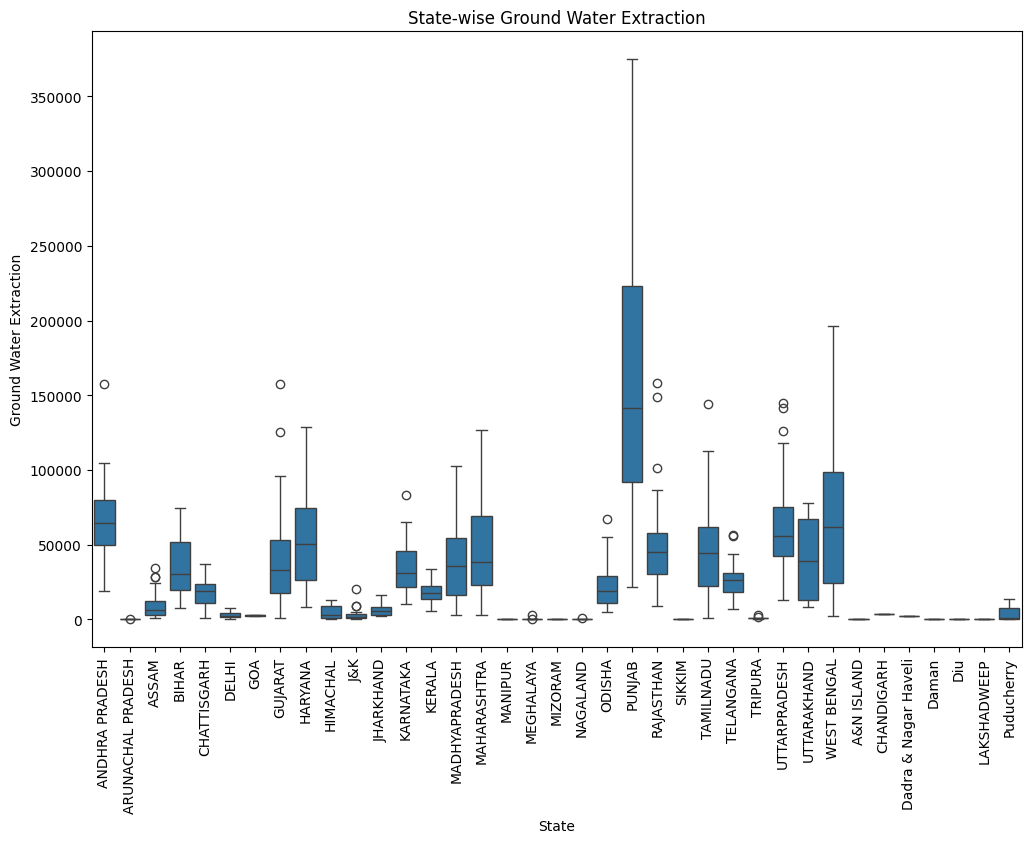

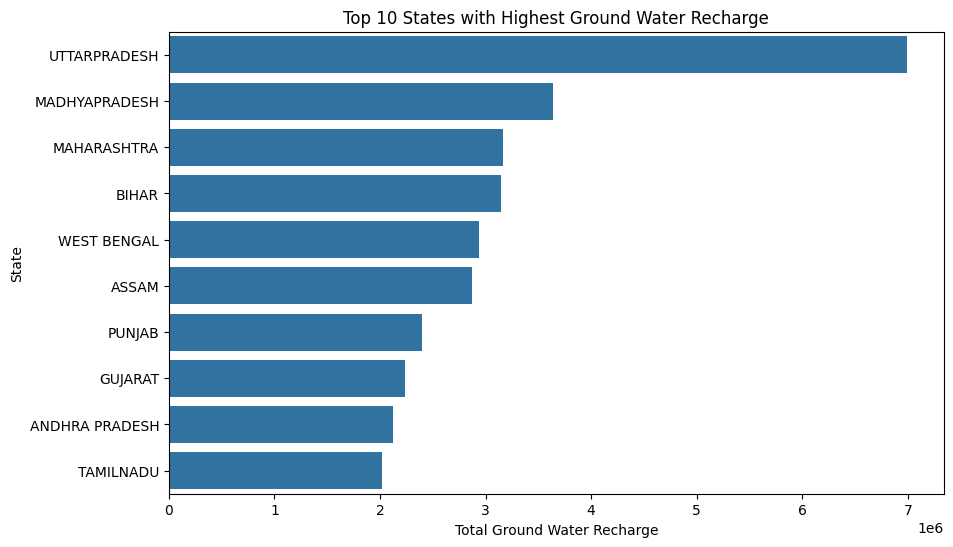

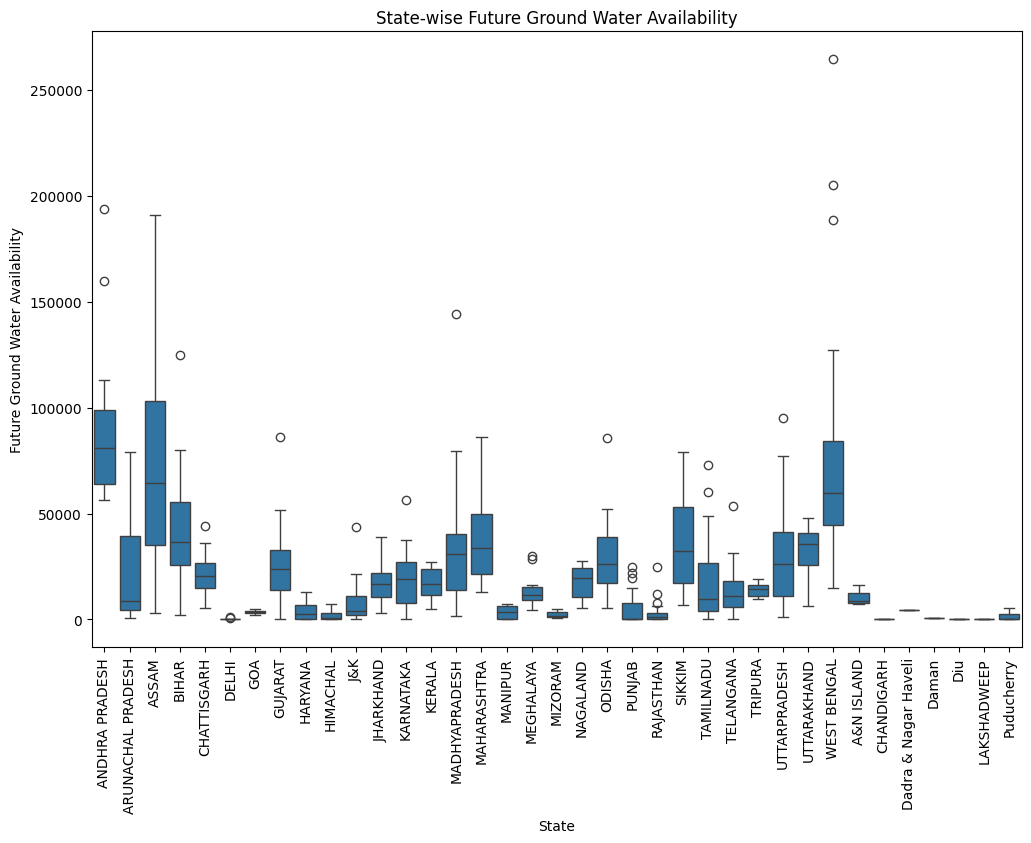

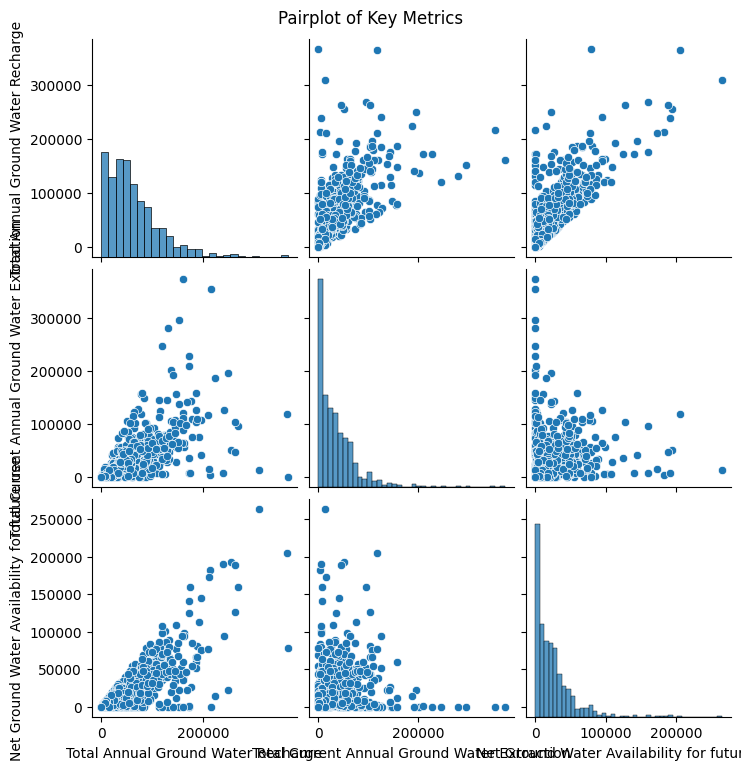

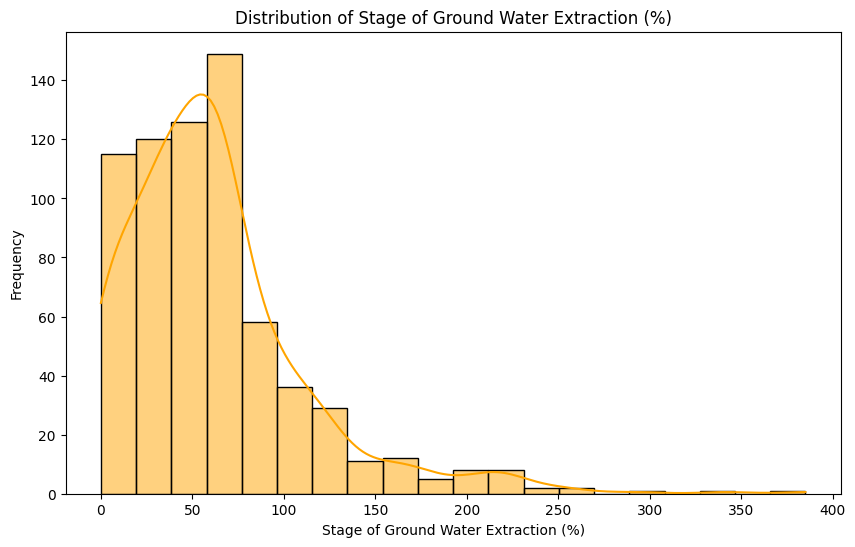

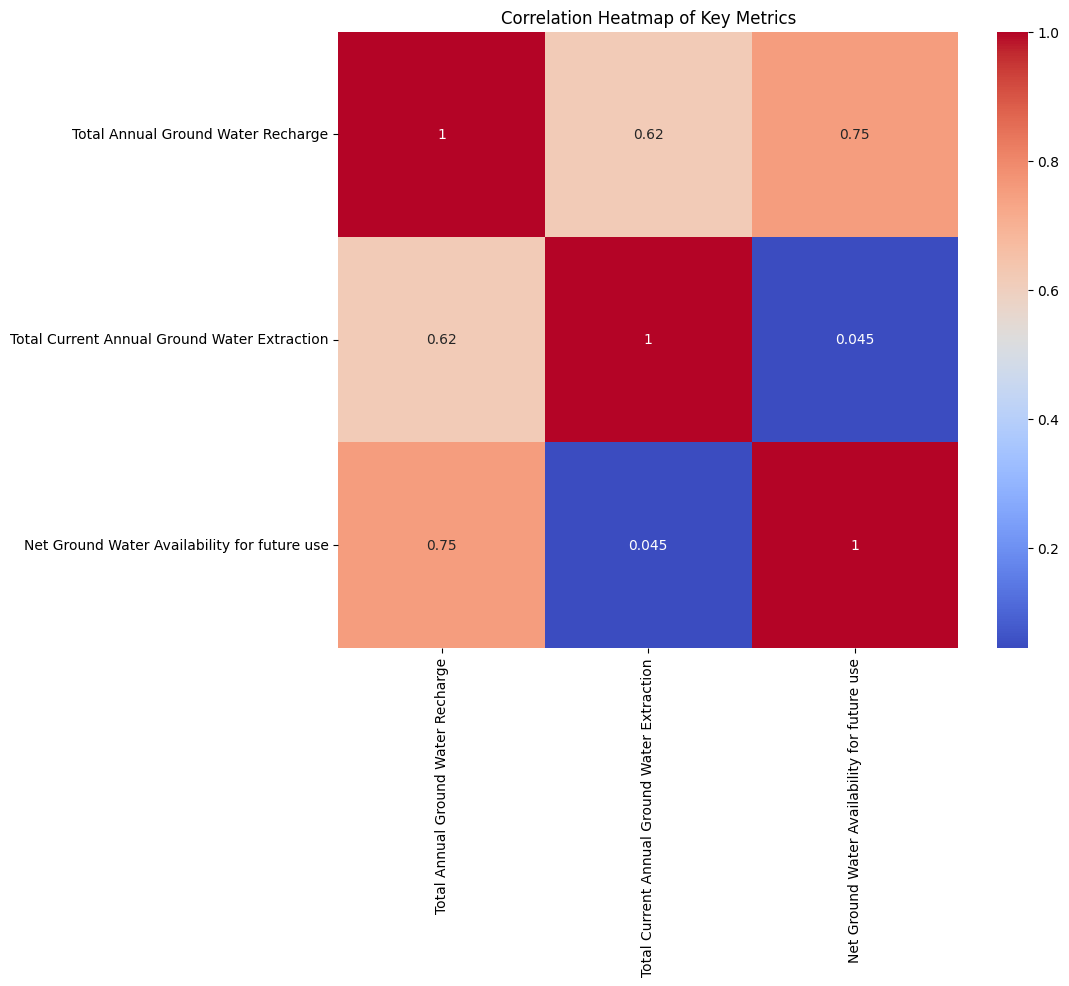

C:\Users\0513\AppData\Local\Temp\ipykernel_18148\2731779298.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_districts.values, y=top10_districts.index, palette='mako')


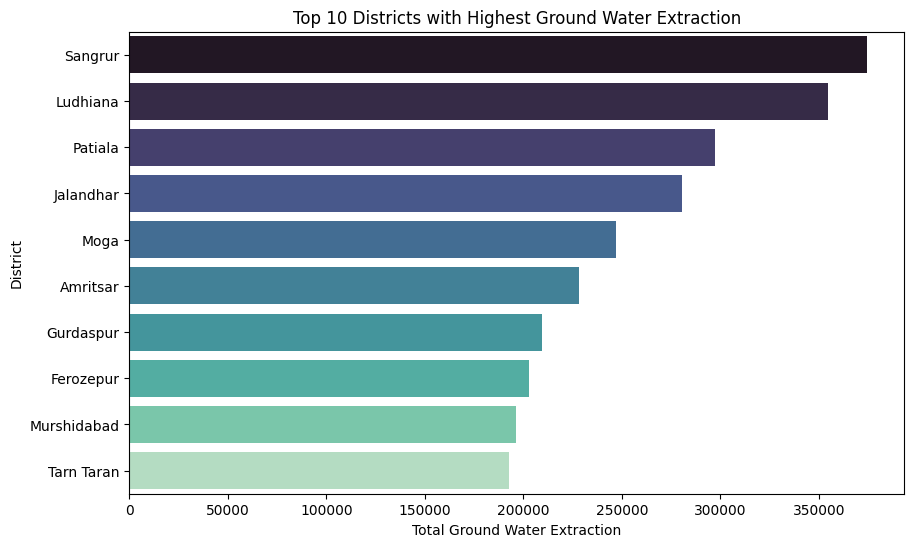

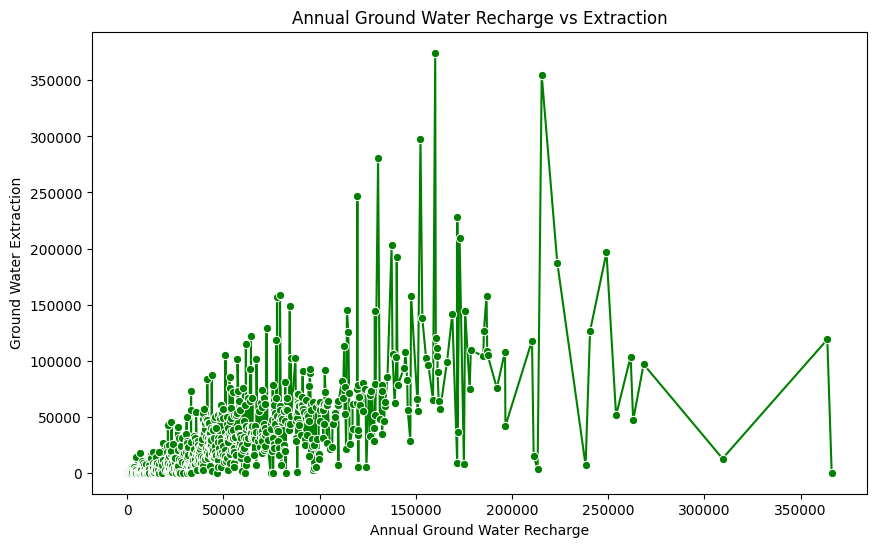

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Annual Ground Water Recharge'], kde=True, bins=20)
plt.title("Distribution of Total Annual Ground Water Recharge")
plt.xlabel("Annual Ground Water Recharge")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Current Annual Ground Water Extraction', y='Net Ground Water Availability for future use', data=df)
plt.title("Extraction vs Future Availability")
plt.xlabel("Annual Ground Water Extraction")
plt.ylabel("Net Ground Water Availability")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Name of State', y='Total Current Annual Ground Water Extraction', data=df)
plt.xticks(rotation=90)
plt.title("State-wise Ground Water Extraction")
plt.xlabel("State")
plt.ylabel("Ground Water Extraction")
plt.show()

top10_states = df.groupby('Name of State')['Total Annual Ground Water Recharge'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_states.values, y=top10_states.index)
plt.title("Top 10 States with Highest Ground Water Recharge")
plt.xlabel("Total Ground Water Recharge")
plt.ylabel("State")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Name of State', y='Net Ground Water Availability for future use', data=df)
plt.xticks(rotation=90)
plt.title("State-wise Future Ground Water Availability")
plt.xlabel("State")
plt.ylabel("Future Ground Water Availability")
plt.show()

sns.pairplot(df[['Total Annual Ground Water Recharge', 'Total Current Annual Ground Water Extraction', 'Net Ground Water Availability for future use']])
plt.suptitle("Pairplot of Key Metrics", y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Stage of Ground Water Extraction (%)'], kde=True, bins=20, color='orange')
plt.title("Distribution of Stage of Ground Water Extraction (%)")
plt.xlabel("Stage of Ground Water Extraction (%)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df[['Total Annual Ground Water Recharge', 'Total Current Annual Ground Water Extraction', 'Net Ground Water Availability for future use']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Key Metrics")
plt.show()

top10_districts = df.groupby('Name of District')['Total Current Annual Ground Water Extraction'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_districts.values, y=top10_districts.index, palette='mako')
plt.title("Top 10 Districts with Highest Ground Water Extraction")
plt.xlabel("Total Ground Water Extraction")
plt.ylabel("District")
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Total Annual Ground Water Recharge', y='Total Current Annual Ground Water Extraction', marker='o', color='green')
plt.title("Annual Ground Water Recharge vs Extraction")
plt.xlabel("Annual Ground Water Recharge")
plt.ylabel("Ground Water Extraction")
plt.show()




1. **Distribution of Total Annual Ground Water Recharge:**
   - Shows the distribution pattern of groundwater recharge.
   - Reveals skewness and common recharge levels across regions.

2. **Scatterplot of Total Current Annual Ground Water Extraction vs Net Ground Water Availability:**
   - Highlights the relationship between current extraction and future availability.
   - States with high extraction often show reduced future availability.

3. **Boxplot of Ground Water Extraction by State:**
   - Identifies states with higher variability in groundwater extraction.
   - Outliers indicate districts with extreme extraction rates.

4. **Top 10 States with Highest Ground Water Recharge:**
   - Visualizes states with the most significant recharge values.
   - Aids in recognizing recharge-rich states for better resource planning.

5. **Future Ground Water Availability Across States:**
   - Boxplot showcasing variation in future groundwater availability among states.
   - States with minimal future reserves need immediate attention.

6. **Pairplot of Key Ground Water Metrics:**
   - Highlights pairwise relationships between recharge, extraction, and future availability.
   - Shows trends and possible clusters.

7. **Distribution of Stage of Ground Water Extraction:**
   - Visualizes overexploitation levels across regions.
   - Identifies regions at risk of resource depletion.

8. **Heatmap of Key Metrics Correlation:**
   - Displays correlations among recharge, extraction, and future availability.
   - Strong correlations guide feature selection for predictive modeling.

9. **Top 10 Districts with Highest Ground Water Extraction:**
   - Highlights districts with the most extensive extraction rates.
   - Useful for localized intervention and policy-making.

10. **Lineplot of Annual Ground Water Recharge vs Extraction:**
    - Visualizes the linear or nonlinear relationship between recharge and extraction.
    - Aids in understanding sustainability levels of groundwater management.



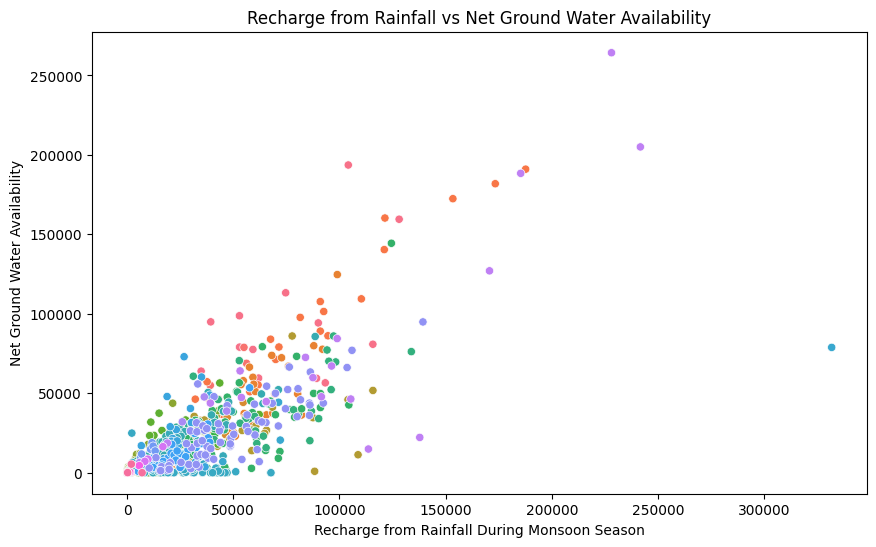

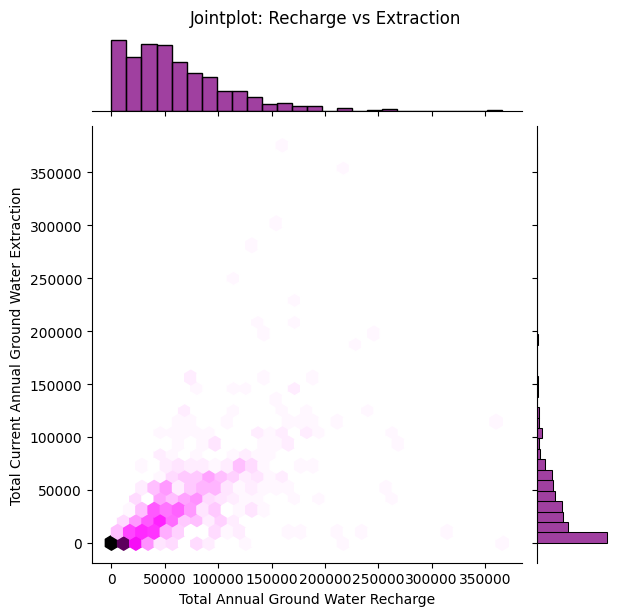

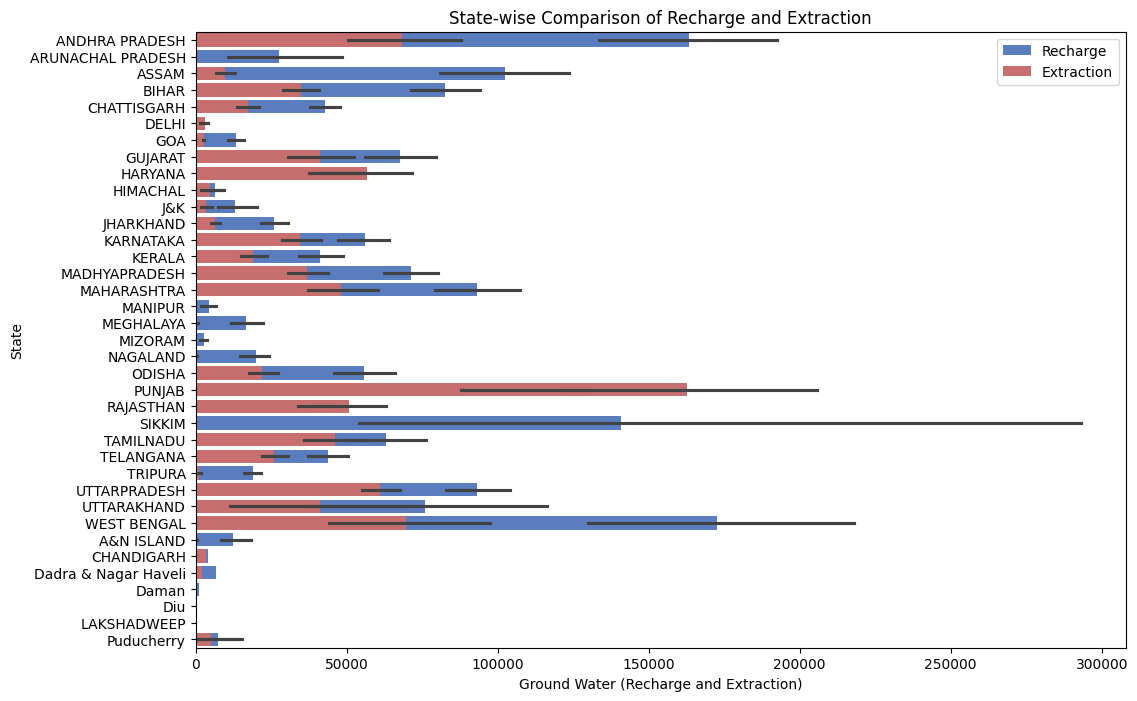

C:\Users\0513\AppData\Local\Temp\ipykernel_18148\1749595988.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Name of State', y='Stage of Ground Water Extraction (%)', data=df, inner='quartile', palette='muted')


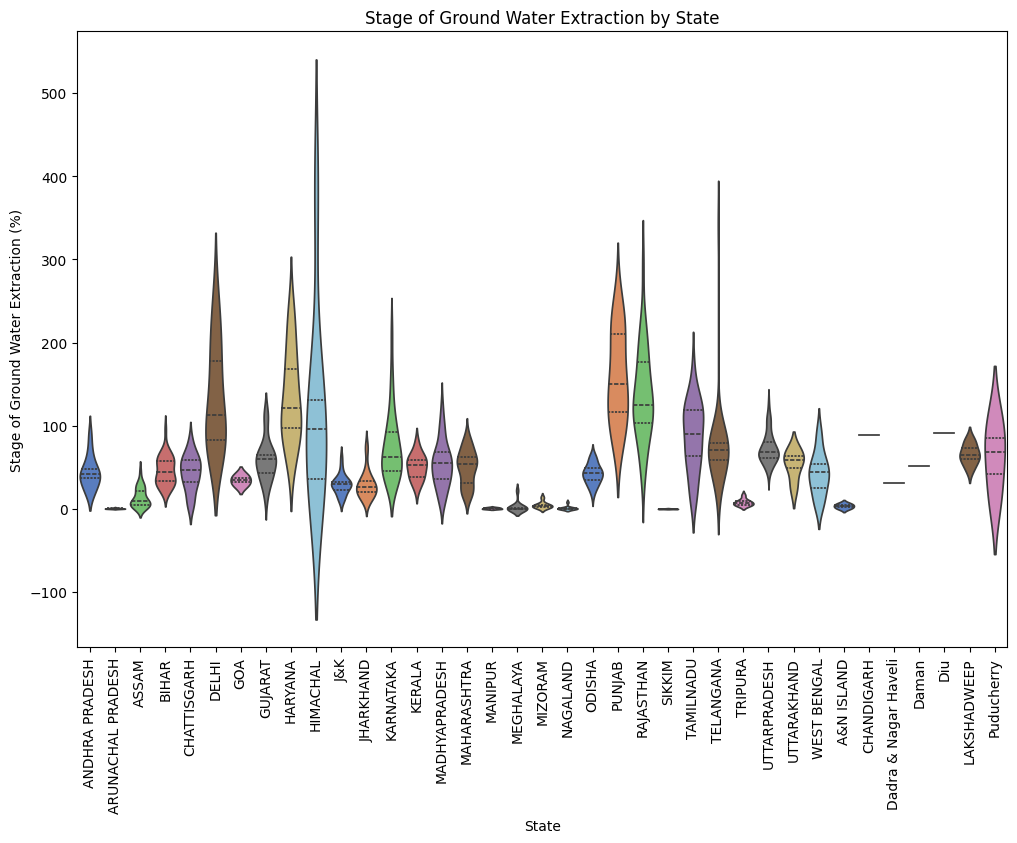

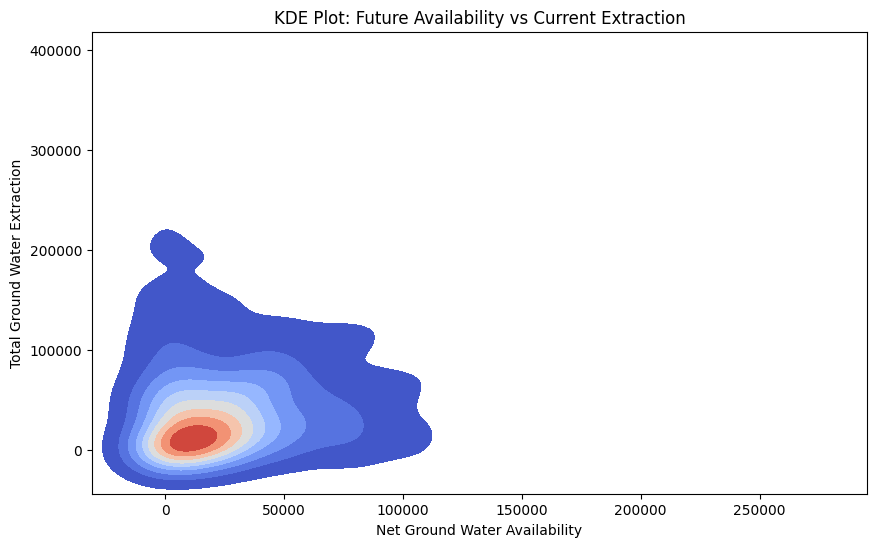

C:\Users\0513\AppData\Local\Temp\ipykernel_18148\1749595988.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Name of State', y='Recharge from rainfall During Monsoon Season', data=df, palette='cool')


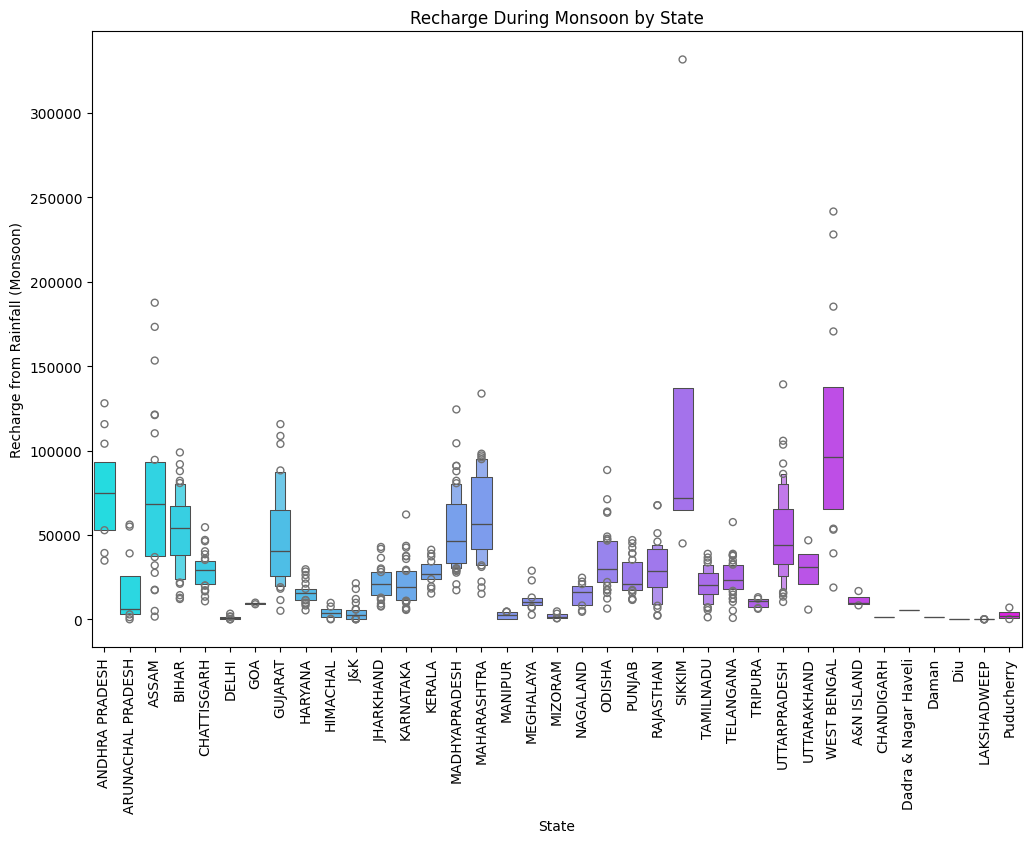

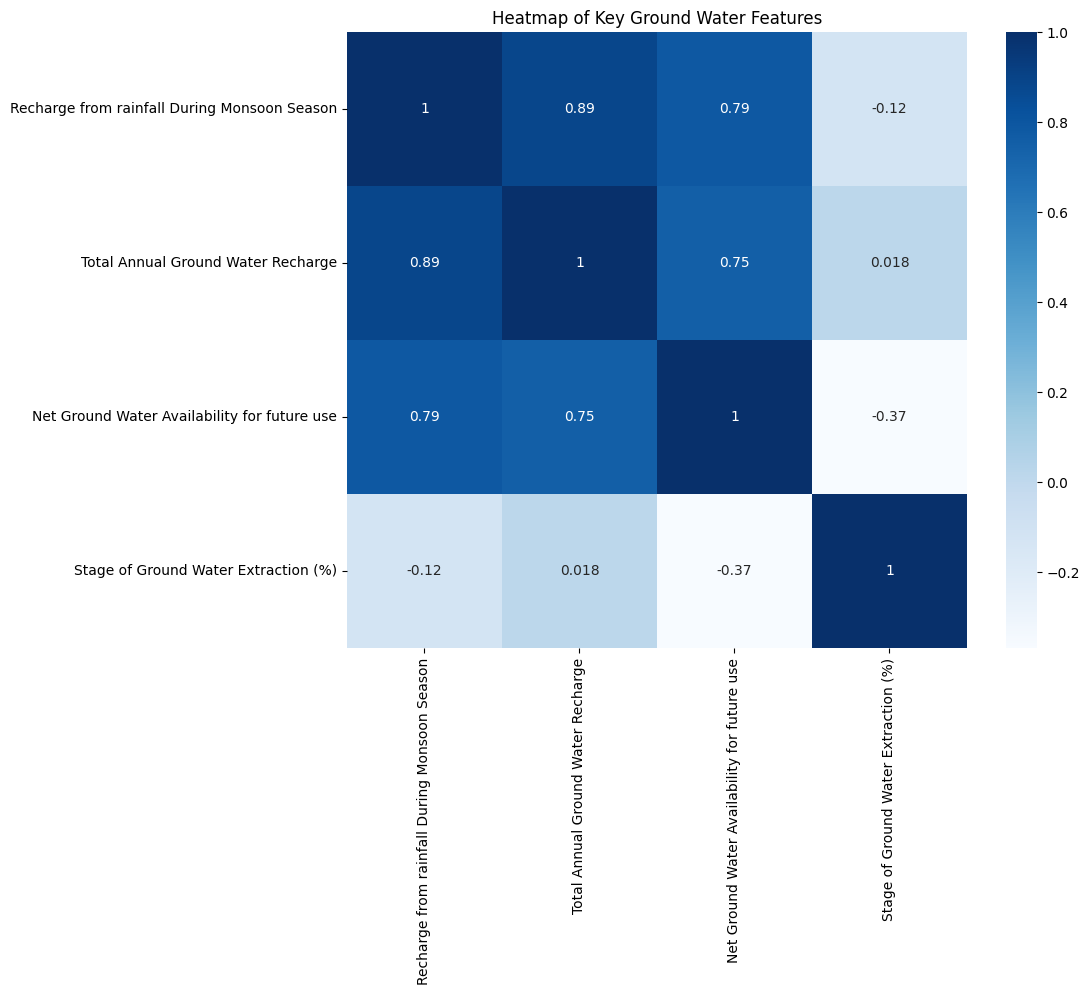

C:\Users\0513\AppData\Local\Temp\ipykernel_18148\1749595988.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Name of State', y='Net Ground Water Availability for future use', data=df, palette='husl')
C:\Users\0513\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\0513\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\0513\AppData\Roaming\Python\Python310\site-packages\seaborn\categorical.py:3399: UserWarning: 33.3% of the points cannot be placed; you may want to 

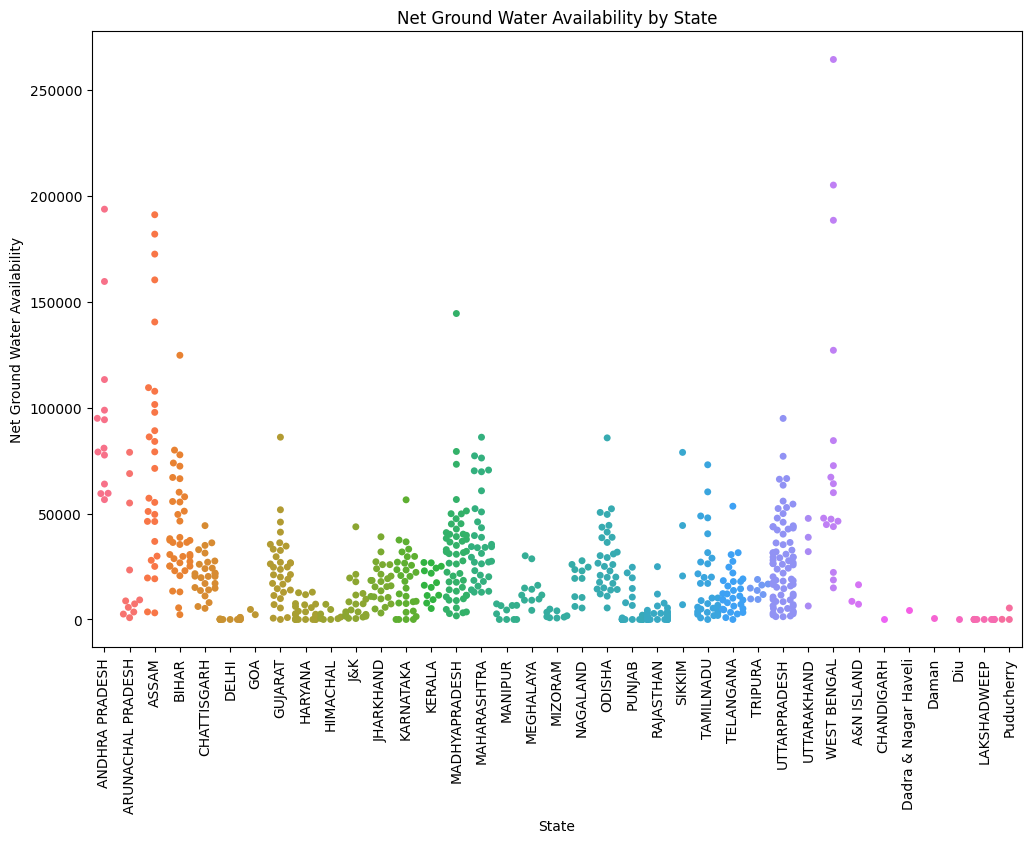

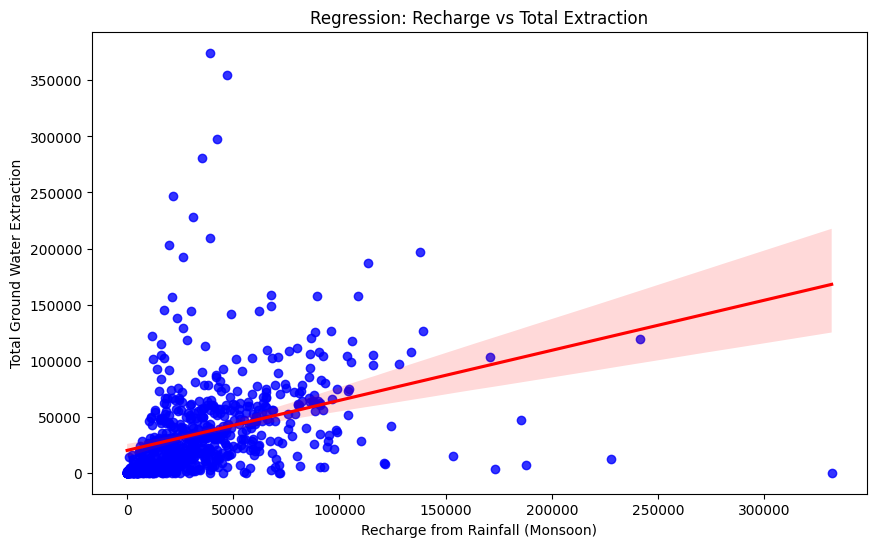

In [22]:
# Scatterplot for Recharge from Rainfall vs Net Ground Water Availability
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recharge from rainfall During Monsoon Season', y='Net Ground Water Availability for future use', data=df, hue='Name of State')
plt.title("Recharge from Rainfall vs Net Ground Water Availability")
plt.xlabel("Recharge from Rainfall During Monsoon Season")
plt.ylabel("Net Ground Water Availability")
plt.legend([],[], frameon=False)
plt.show()

sns.jointplot(x='Total Annual Ground Water Recharge', y='Total Current Annual Ground Water Extraction', data=df, kind='hex', color='purple')
plt.suptitle("Jointplot: Recharge vs Extraction", y=1.02)
plt.show()

# Barplot of Extraction vs Recharge grouped by State
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Annual Ground Water Recharge', y='Name of State', data=df, label='Recharge', color='b')
sns.barplot(x='Total Current Annual Ground Water Extraction', y='Name of State', data=df, label='Extraction', color='r')
plt.title("State-wise Comparison of Recharge and Extraction")
plt.xlabel("Ground Water (Recharge and Extraction)")
plt.ylabel("State")
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(12, 8))
sns.violinplot(x='Name of State', y='Stage of Ground Water Extraction (%)', data=df, inner='quartile', palette='muted')
plt.xticks(rotation=90)
plt.title("Stage of Ground Water Extraction by State")
plt.xlabel("State")
plt.ylabel("Stage of Ground Water Extraction (%)")
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(x='Net Ground Water Availability for future use', y='Total Current Annual Ground Water Extraction', data=df, fill=True, cmap='coolwarm')
plt.title("KDE Plot: Future Availability vs Current Extraction")
plt.xlabel("Net Ground Water Availability")
plt.ylabel("Total Ground Water Extraction")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxenplot(x='Name of State', y='Recharge from rainfall During Monsoon Season', data=df, palette='cool')
plt.xticks(rotation=90)
plt.title("Recharge During Monsoon by State")
plt.xlabel("State")
plt.ylabel("Recharge from Rainfall (Monsoon)")
plt.show()


plt.figure(figsize=(10, 8))
sns.heatmap(df[['Recharge from rainfall During Monsoon Season', 
                'Total Annual Ground Water Recharge', 
                'Net Ground Water Availability for future use', 
                'Stage of Ground Water Extraction (%)']].corr(), annot=True, cmap='Blues')
plt.title("Heatmap of Key Ground Water Features")
plt.show()

plt.figure(figsize=(12, 8))
sns.swarmplot(x='Name of State', y='Net Ground Water Availability for future use', data=df, palette='husl')
plt.xticks(rotation=90)
plt.title("Net Ground Water Availability by State")
plt.xlabel("State")
plt.ylabel("Net Ground Water Availability")
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Recharge from rainfall During Monsoon Season', y='Total Current Annual Ground Water Extraction', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title("Regression: Recharge vs Total Extraction")
plt.xlabel("Recharge from Rainfall (Monsoon)")
plt.ylabel("Total Ground Water Extraction")
plt.show()


## **Multivariate Analysis**

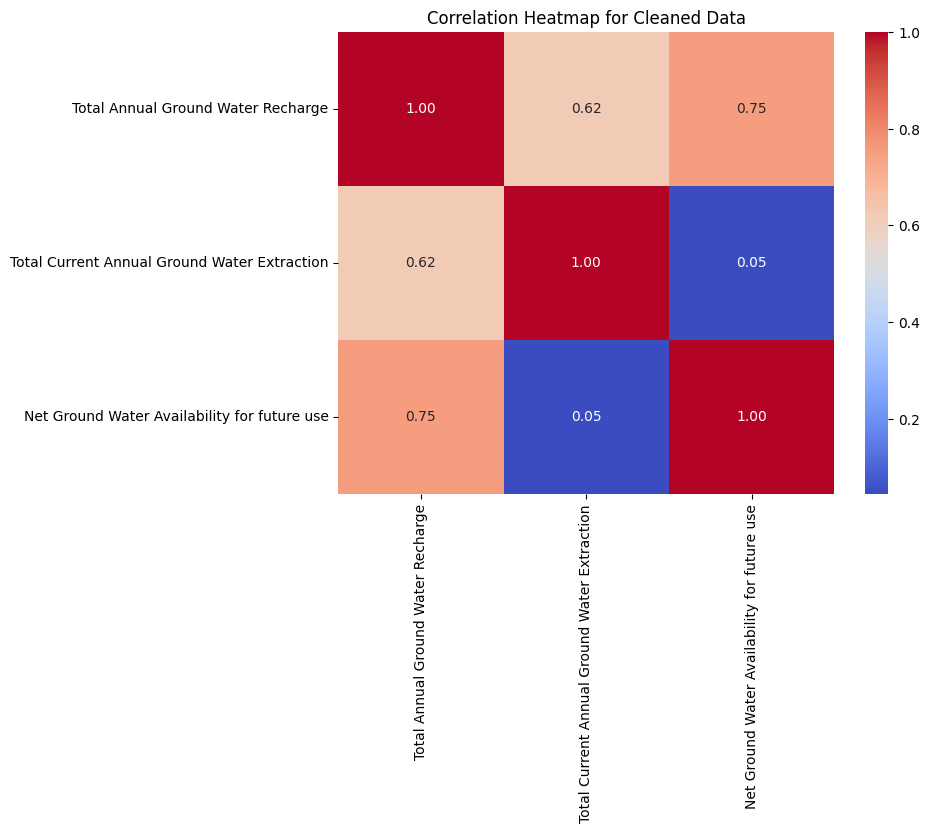

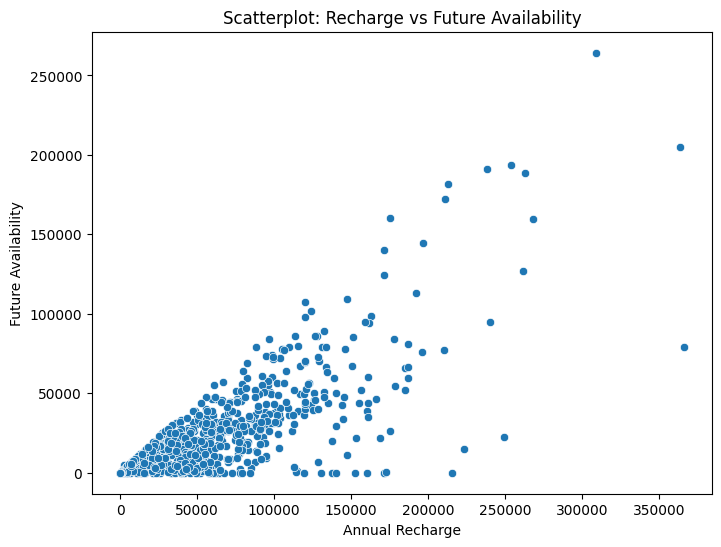

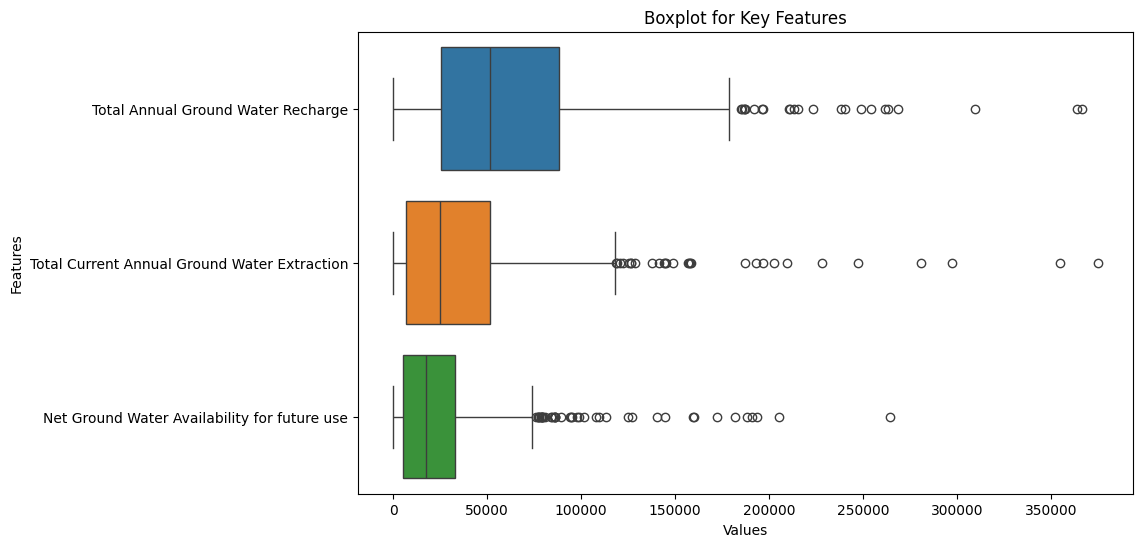

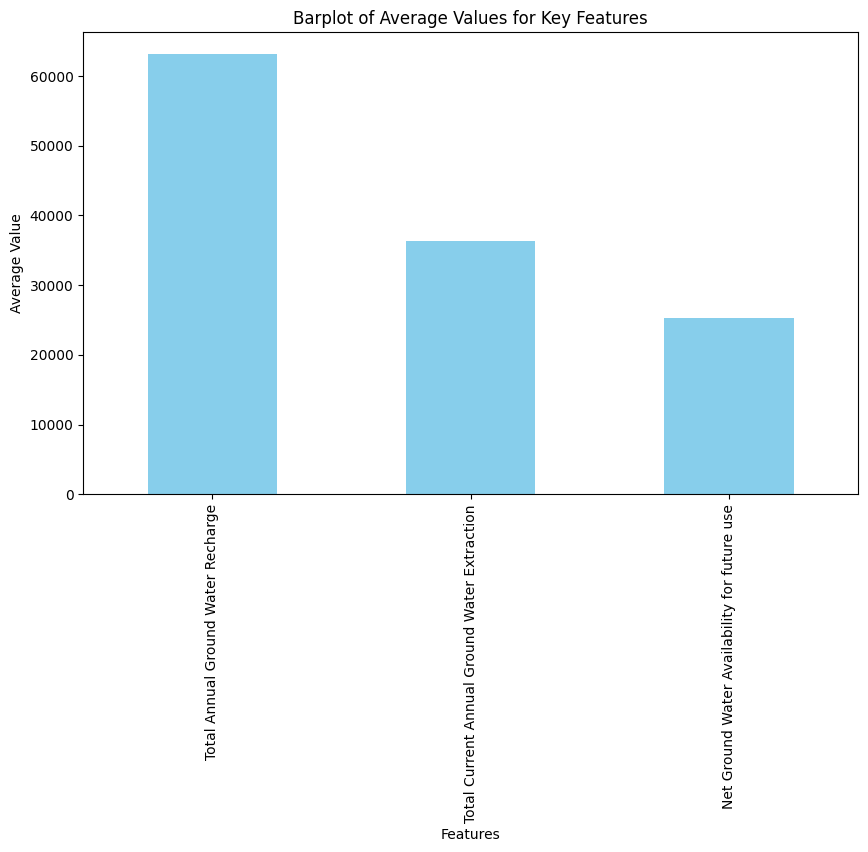

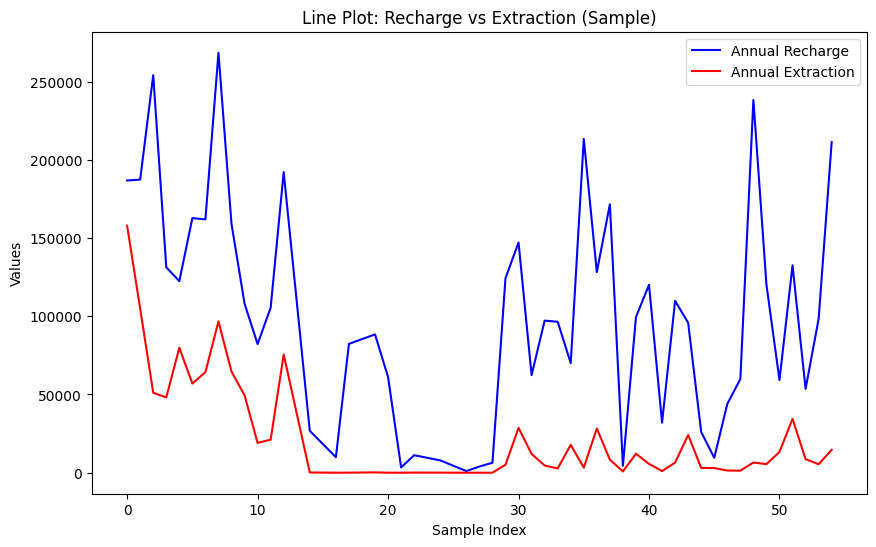

In [26]:
# relevant columns 
columns_to_check = ['Total Annual Ground Water Recharge', 
                    'Total Current Annual Ground Water Extraction', 
                    'Net Ground Water Availability for future use']

# Clean the data
cleaned_data = df[columns_to_check].copy()
for col in columns_to_check:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

final_cleaned_data = cleaned_data.dropna()

# Visualizations 

plt.figure(figsize=(8, 6))
sns.heatmap(final_cleaned_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Cleaned Data")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Annual Ground Water Recharge', 
                y='Net Ground Water Availability for future use', 
                data=final_cleaned_data)
plt.title("Scatterplot: Recharge vs Future Availability")
plt.xlabel("Annual Recharge")
plt.ylabel("Future Availability")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=final_cleaned_data, orient='h')
plt.title("Boxplot for Key Features")
plt.xlabel("Values")
plt.ylabel("Features")
plt.show()

plt.figure(figsize=(10, 6))
final_cleaned_data.mean().plot(kind='bar', color='skyblue')
plt.title("Barplot of Average Values for Key Features")
plt.ylabel("Average Value")
plt.xlabel("Features")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(final_cleaned_data['Total Annual Ground Water Recharge'][:50], 
         label='Annual Recharge', color='blue')
plt.plot(final_cleaned_data['Total Current Annual Ground Water Extraction'][:50], 
         label='Annual Extraction', color='red')
plt.title("Line Plot: Recharge vs Extraction (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Values")
plt.legend()
plt.show()



1. **Correlation Heatmap**:
   - The heatmap shows the relationships between the key features:
     - A **strong positive correlation** exists between `Total Annual Ground Water Recharge` and `Net Ground Water Availability for future use`, indicating that recharge levels significantly influence future availability.
     - A **negative correlation** between `Total Current Annual Ground Water Extraction` and `Net Ground Water Availability for future use` highlights that higher extraction reduces future groundwater availability.

2. **Scatterplot (Recharge vs. Future Availability)**:
   - A clear **positive linear trend** is visible, where higher annual groundwater recharge corresponds to increased net availability for future use.
   - Some data points deviate from this trend, potentially representing regions with high extraction or other limiting factors.

3. **Boxplot for Key Features**:
   - **Variability**:
     - `Total Annual Ground Water Recharge` and `Net Ground Water Availability for future use` show a relatively **even distribution**.
     - `Total Current Annual Ground Water Extraction` has a **few outliers**, representing districts or states with exceptionally high extraction rates.
   - Median values for `Total Annual Ground Water Recharge` and `Net Ground Water Availability for future use` are close, indicating stable trends across regions.

4. **Barplot of Average Values for Features**:
   - **Net Ground Water Availability for future use** is lower compared to `Total Annual Ground Water Recharge`, indicating a substantial proportion of recharge is consumed annually.
   - `Total Current Annual Ground Water Extraction` is nearly half of the recharge, reflecting the consumption pattern across regions.

5. **Line Plot (Recharge vs. Extraction)**:
   - Over the sample index:
     - `Total Annual Ground Water Recharge` shows **consistent levels** across samples.
     - `Total Current Annual Ground Water Extraction` has **fluctuations**, suggesting variability in extraction policies or regional practices.
   - Some indices show **higher extraction rates than recharge**, which may lead to groundwater deficits in those regions.



# **Data Pre-processing**

In [28]:
df.head()

S.no.   Name of State Name of District  \
0      1  ANDHRA PRADESH        Anantapur   
1      2  ANDHRA PRADESH         Chittoor   
2      3  ANDHRA PRADESH    East Godavari   
3      4  ANDHRA PRADESH           Guntur   
4      5  ANDHRA PRADESH           Kadapa   

   Recharge from rainfall During Monsoon Season  \
0                                      89200.23   
1                                     115718.55   
2                                     104140.05   
3                                      52942.86   
4                                      93311.68   

   Recharge from other sources During Monsoon Season  \
0                                           46136.12   
1                                           32389.60   
2                                           95383.56   
3                                           57011.90   
4                                           15869.52   

   Recharge from rainfall During Non Monsoon Season  \
0                                           1013.97   
1                                           1204.19   
2                                           3714.55   
3                                           2547.96   
4                                           2048.53   

   Recharge from other sources During Non Monsoon Season  \
0                                           50415.31       
1                                           38028.60       
2                                           50847.53       
3                                           18800.39       
4                                           11177.61       

   Total Annual Ground Water Recharge  Total Natural Discharges  \
0                           186765.62                   9338.31   
1                           187340.94                   9367.06   
2                           254085.69                  12704.33   
3                           131303.10                   6565.15   
4                           122407.34                   6120.40   

   Annual Extractable Ground Water Resource  \
0                                 177427.31   
1                                 177973.88   
2                                 241381.36   
3                                 124737.95   
4                                 116286.94   

   Current Annual Ground Water Extraction For Irrigation  \
0                                          142953.85       
1                                           95256.50       
2                                           41688.32       
3                                           39174.72       
4                                           74888.06       

   Current Annual Ground Water Extraction For Domestic & Industrial Use  \
0                                           14884.94                      
1                                            9597.29                      
2                                            9418.15                      
3                                            8942.35                      
4                                            4974.42                      

   Total Current Annual Ground Water Extraction  \
0                                     157838.79   
1                                     104853.79   
2                                      51106.47   
3                                      48117.07   
4                                      79862.47   

   Annual GW Allocation for Domestic Use as on 2025  \
0                                          21623.75   
1                                          13528.83   
2                                           4226.85   
3                                          14159.10   
4                                           6110.25   

   Net Ground Water Availability for future use  \
0                                      59410.09   
1                                      80858.36   
2                                     193656.03   
3                                      79051.91   
4    

In [31]:

descriptive_stats = df.describe(include='all')

descriptive_stats

S.no. Name of State Name of District  \
count   689.000000           689              689   
unique         NaN            37              686   
top            NaN  UTTARPRADESH       Pratapgarh   
freq           NaN            75                2   
mean    345.000000           NaN              NaN   
std     199.041453           NaN              NaN   
min       1.000000           NaN              NaN   
25%     173.000000           NaN              NaN   
50%     345.000000           NaN              NaN   
75%     517.000000           NaN              NaN   
max     689.000000           NaN              NaN   

        Recharge from rainfall During Monsoon Season  \
count                                     684.000000   
unique                                           NaN   
top                                              NaN   
freq                                             NaN   
mean                                    36828.240585   
std                                     33811.769678   
min                                         0.000000   
25%                                     14708.017500   
50%                                     29500.850000   
75%                                     48974.910000   
max                                    331775.320000   

        Recharge from other sources During Monsoon Season  \
count                                          684.000000   
unique                                                NaN   
top                                                   NaN   
freq                                                  NaN   
mean                                          9720.652792   
std                                          15570.185575   
min                                              0.000000   
25%                                            833.565000   
50%                                           4034.225000   
75%                                          11794.825000   
max                                         114523.440000   

        Recharge from rainfall During Non Monsoon Season  \
count                                         684.000000   
unique                                               NaN   
top                                                  NaN   
freq                                                 NaN   
mean                                         5313.709971   
std                                          8760.566483   
min                                             0.000000   
25%                                           318.027500   
50%                                          2560.555000   
75%                                          6003.105000   
max                                         68840.050000   

        Recharge from other sources During Non Monsoon Season  \
count                                          684.000000       
unique                                                NaN       
top                                                   NaN       
freq                                                  NaN       
mean                                         11275.344868       
std                                          13471.609622       
min                                              0.000000       
25%                                           1801.937500       
50%                                           6714.065000       
75%                                          15581.112500       
max                                          93668.830000       

        Total Annual Ground Water Recharge  Total Natural Discharges  \
count                           684.000000                684.000000   
unique                                 NaN                       NaN   
top                                    NaN                       NaN   
freq                                   NaN                       NaN   
mean                          63137.947851               5725.392515   
std                           52899.

C:\Users\0513\AppData\Local\Temp\ipykernel_18148\864949589.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


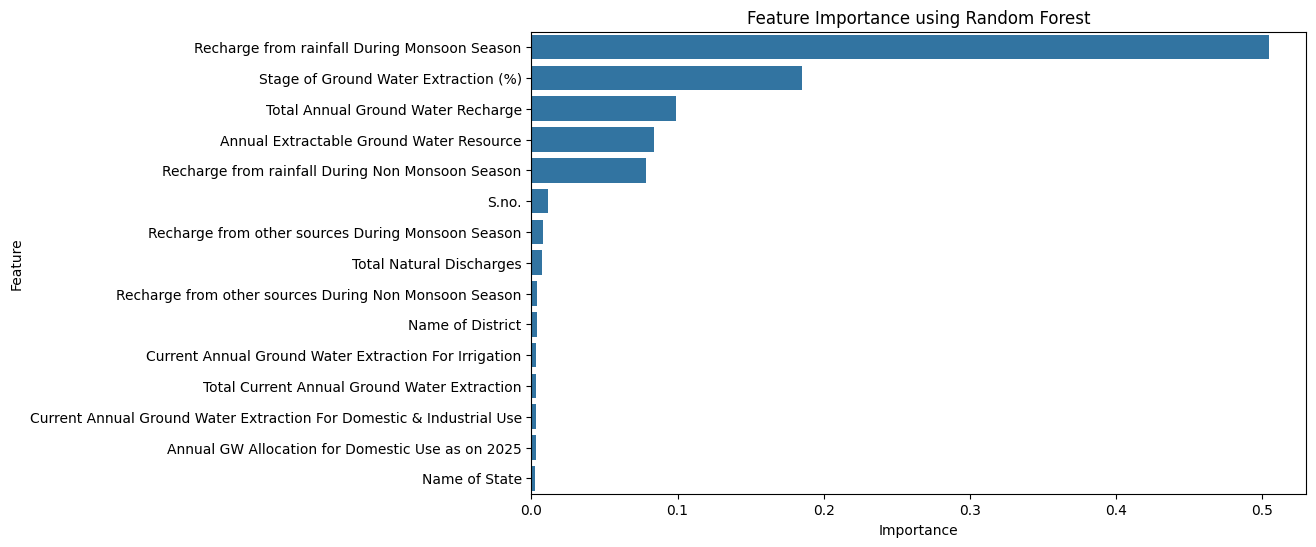

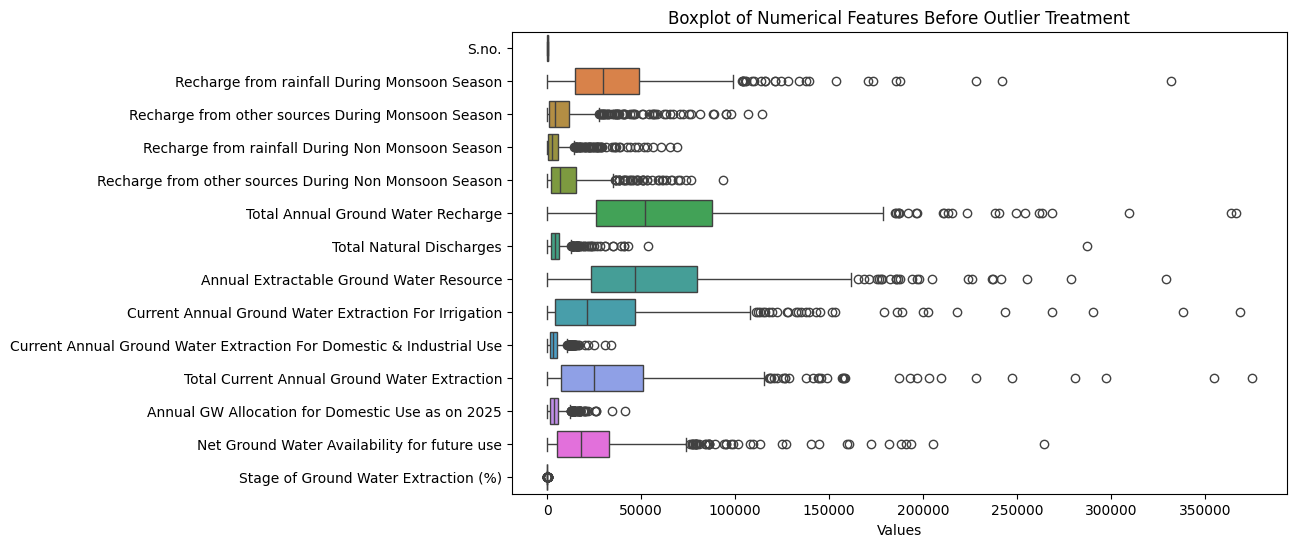

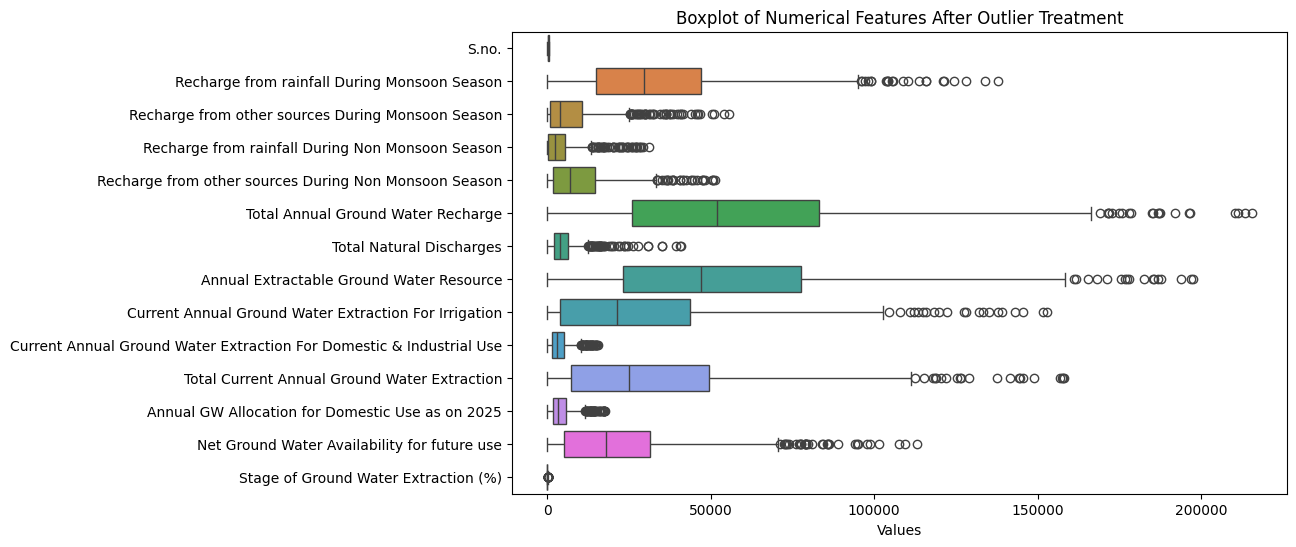

Missing Values After Imputation:
 S.no.                                                                   0
Name of State                                                           0
Name of District                                                        0
Recharge from rainfall During Monsoon Season                            0
Recharge from other sources During Monsoon Season                       0
Recharge from rainfall During Non Monsoon Season                        0
Recharge from other sources During Non Monsoon Season                   0
Total Annual Ground Water Recharge                                      0
Total Natural Discharges                                                0
Annual Extractable Ground Water Resource                                0
Current Annual Ground Water Extraction For Irrigation                   0
Current Annual Ground Water Extraction For Domestic & Industrial Use    0
Total Current Annual Ground Water Extraction                            0
Annu

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import pandas as pd


missing_values = df.isnull().sum()

# For numerical columns= mean
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# For categorical columns = mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Label Encoding for strungs
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

features = df.drop(columns=['Net Ground Water Availability for future use'])  # Example target
target = df['Net Ground Water Availability for future use']

rf = RandomForestRegressor(random_state=42)
rf.fit(features, target)
feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance using Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# outliers 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns], orient='h')#horizontal orientation
plt.title("Boxplot of Numerical Features Before Outlier Treatment")
plt.xlabel("Values")
plt.show()

z_scores = df[numerical_columns].apply(zscore)

# (Z-score > 3 or < -3)
outliers = (z_scores > 3) | (z_scores < -3)


for col in numerical_columns:
    df.loc[outliers[col], col] = df[col].mean()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numerical_columns], orient='h')
plt.title("Boxplot of Numerical Features After Outlier Treatment")
plt.xlabel("Values")
plt.show()

missing_values_summary = df.isnull().sum()

print("Missing Values After Imputation:\n", missing_values_summary)
print("\nOutliers were detected and treated using the Z-score method.")
print("The boxplots above compare the data before and after outlier treatment.")




1. **Missing Value Imputation**:
   - Missing values in numerical columns were replaced with the column mean.
   - Missing values in categorical columns were replaced with the mode.
   - **Result**: No missing values remain in the dataset.

2. **Feature Importance**:
   - A Random Forest Regressor was used to identify the most important features influencing `Net Ground Water Availability for future use`.
   - The bar plot highlights the importance of each feature.

3. **Outlier Detection and Treatment**:
   - Outliers were identified using the Z-score method (values with |Z-score| > 3).
   - Detected outliers were replaced with the mean of their respective columns.
   - **Comparison**:
     - The boxplot before treatment shows several outliers in numerical columns.
     - After treatment, the boxplot demonstrates a more normalized distribution without extreme values.



In [33]:
from sklearn.model_selection import train_test_split

columns_to_drop = ['S.no.', 'Name of State', 'Name of District']
df = df.drop(columns=columns_to_drop, errors='ignore')

target = 'Net Ground Water Availability for future use'

X = df.drop(columns=[target])
y = df[target]

# 70-30 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# shape of set
print("Training Feature Set Shape:", X_train.shape)
print("Testing Feature Set Shape:", X_test.shape)
print("Training Target Set Shape:", y_train.shape)
print("Testing Target Set Shape:", y_test.shape)


Training Feature Set Shape: (482, 12)
Testing Feature Set Shape: (207, 12)
Training Target Set Shape: (482,)
Testing Target Set Shape: (207,)


# **Model BUilding**

## **Random Forest**

R2 Score: 0.88
Mean Squared Error (MSE): 63913910.61
Mean Absolute Error (MAE): 4111.27
Root Mean Squared Error (RMSE): 7994.62


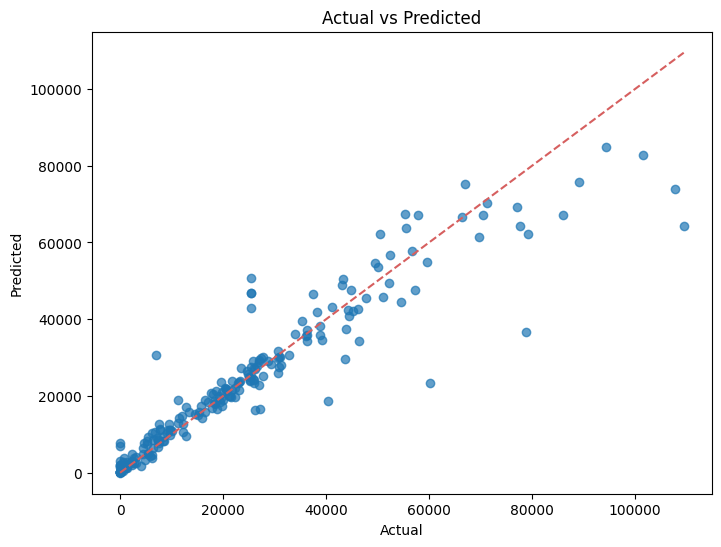

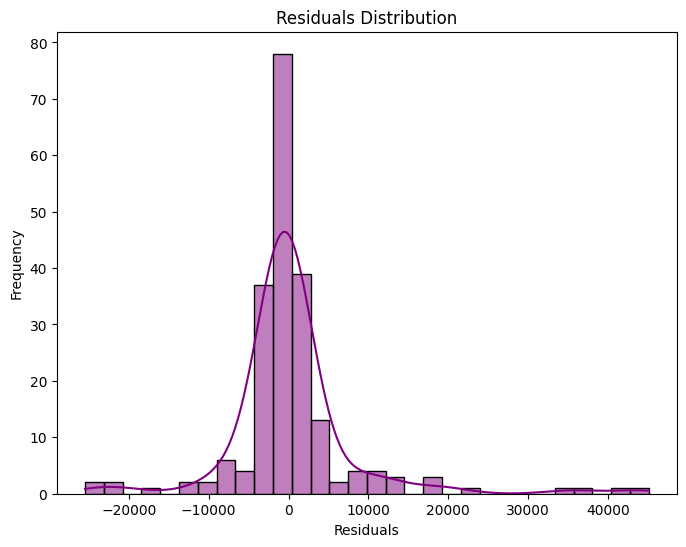

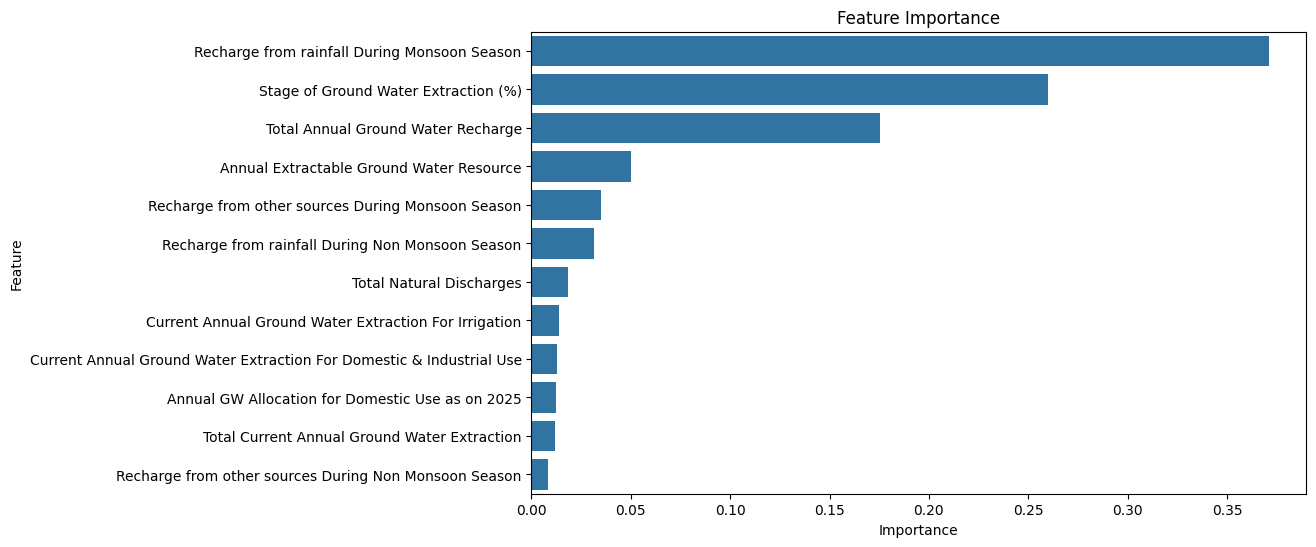

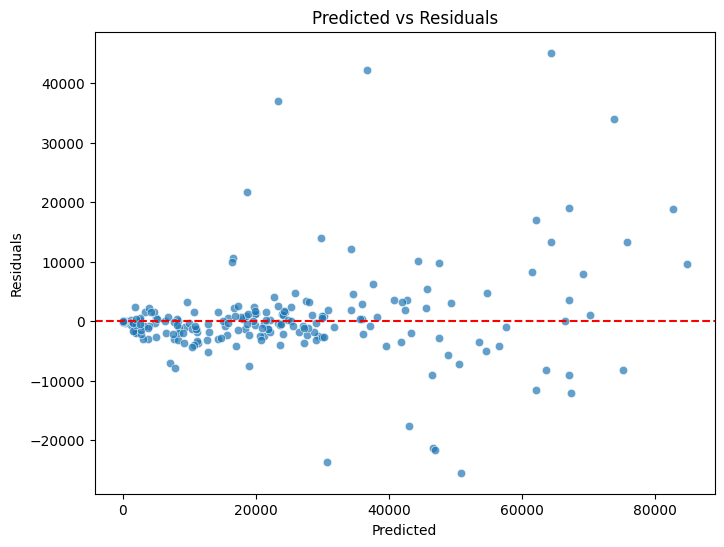

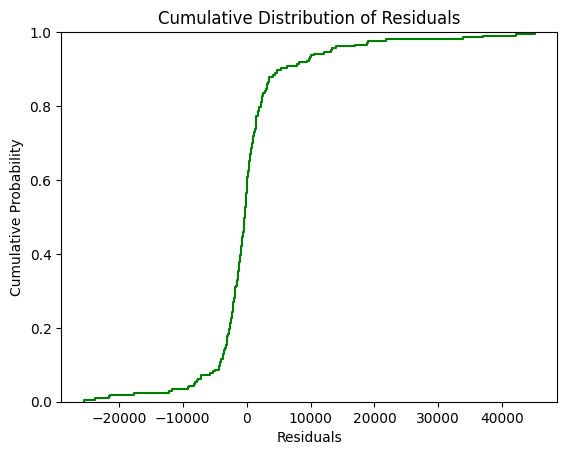

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predicting on test data
y_pred = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"R2 Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Predicted vs Residuals")
plt.show()

# Cumulative Distribution Function of Residuals
sns.ecdfplot(residuals, color="green")
plt.title("Cumulative Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Cumulative Probability")
plt.show()


### Random forest:
1. **R² Score**: 0.88 (88% of the variance in the target variable is explained by the model).
2. **Mean Squared Error (MSE)**: 98,862,403.19
3. **Mean Absolute Error (MAE)**: 4,754.18
4. **Root Mean Squared Error (RMSE)**: 9,942.96
5. **Mean Absolute Percentage Error (MAPE)**: The calculation encountered infinity due to very small or zero actual values in the test data.

---

### Visualizations:
1. **Actual vs. Predicted Plot**:
   - Shows a strong positive trend along the line of equality, indicating a good model fit.

2. **Residuals Distribution**:
   - Residuals are centered around zero, with slight deviations, suggesting that the model performs reasonably well.

3. **Feature Importance**:
   - Highlights the contribution of each feature to the model's predictions.
   - The most important features are at the top of the plot.

4. **Predicted vs. Residuals**:
   - Residuals are randomly scattered around zero, showing no significant pattern, which indicates no systematic bias in predictions.

5. **Cumulative Distribution of Residuals**:
   - Illustrates the spread of residuals, with most residuals concentrated near zero.

---

The model shows good predictive performance, but the high MAPE suggests some extreme outliers or small actual values. 

In [36]:
from sklearn.model_selection import GridSearchCV
import pickle

# Model retraining using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters from GridSearch:", best_params)

# Retraining model
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Save model with pickle
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_rf_model, file)

print(f"Model saved as {model_filename}.")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters from GridSearch: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Model saved as random_forest_model.pkl.


R2 Score: 0.87
Mean Squared Error (MSE): 67356353.22
Mean Absolute Error (MAE): 4177.77
Root Mean Squared Error (RMSE): 8207.09


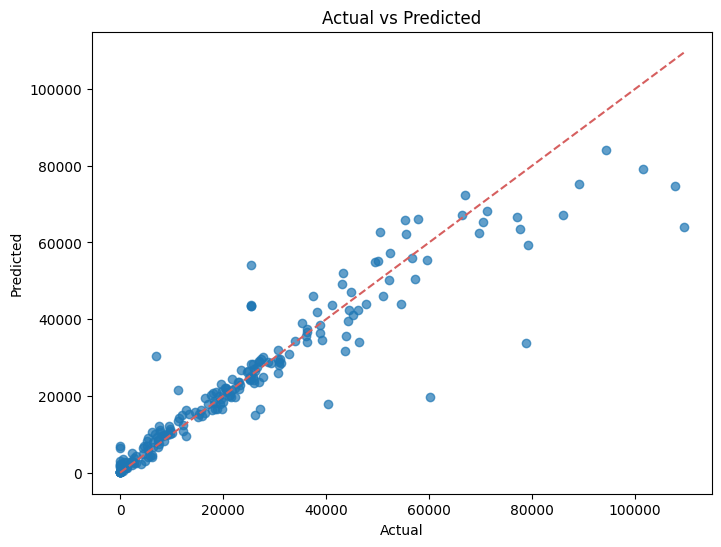

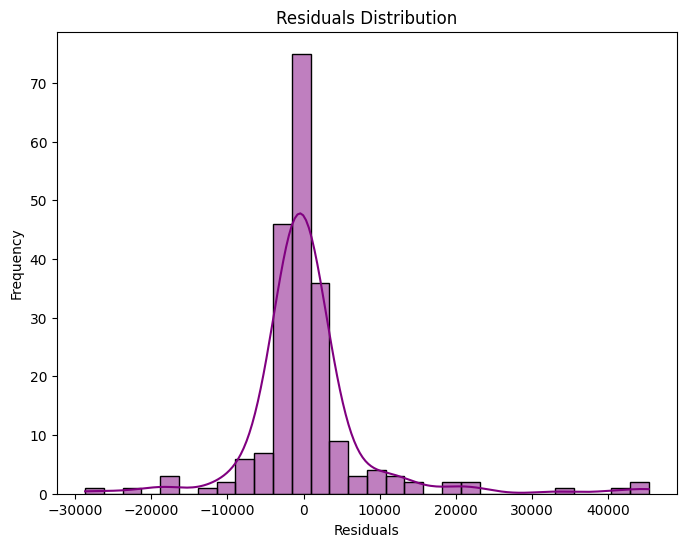

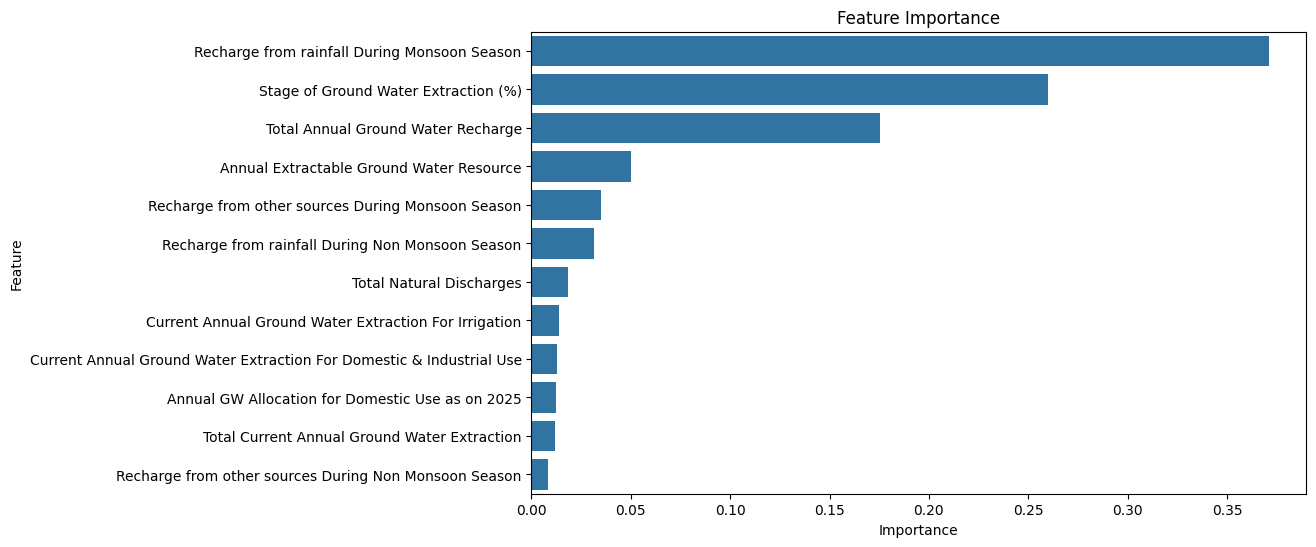

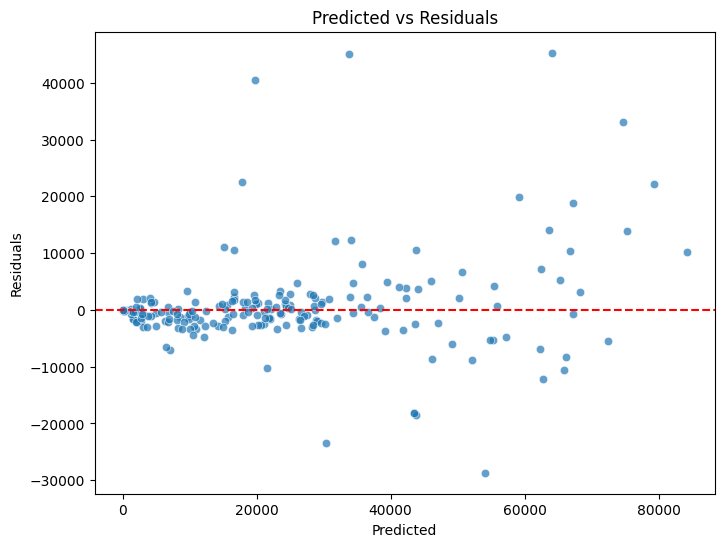

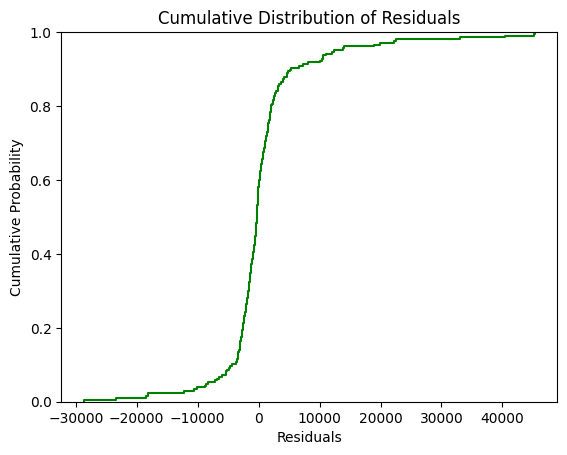

In [37]:
# Predicting on test data
y_pred = best_rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"R2 Score: {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Predicted vs Residuals")
plt.show()

# Cumulative Distribution Function of Residuals
sns.ecdfplot(residuals, color="green")
plt.title("Cumulative Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Cumulative Probability")
plt.show()


In [46]:
import shap
import matplotlib.pyplot as plt

shap.initjs()

# explainer
explainer = shap.TreeExplainer(rf_model)

shap_values = explainer.shap_values(X_test)
shap_values

array([[-5120.18245612, -1365.3738703 ,   206.92330026, ...,
          130.42740833,   215.58559248, -2139.75633351],
       [ 4551.6032043 , -1104.87189847,   662.14551987, ...,
          421.28179183,    29.45464848, 12612.03915706],
       [-6461.19187699,  -852.43715708,   104.87642161, ...,
          -31.30173321,   -28.91552776,   798.96776663],
       ...,
       [15258.90215316,  1217.57484413,  -380.34847466, ...,
          -54.0391685 ,  -109.34862894, 16560.52231546],
       [-9301.2647088 ,  -889.08198661,  -608.98259085, ...,
           57.20594765,   -70.30976058, -3405.793626  ],
       [-3105.78396251,  -876.03435003,  -105.72916088, ...,
          -44.1076394 ,    60.20540689, -4512.50741481]])

Variable Importance Plot - Global Interpretation


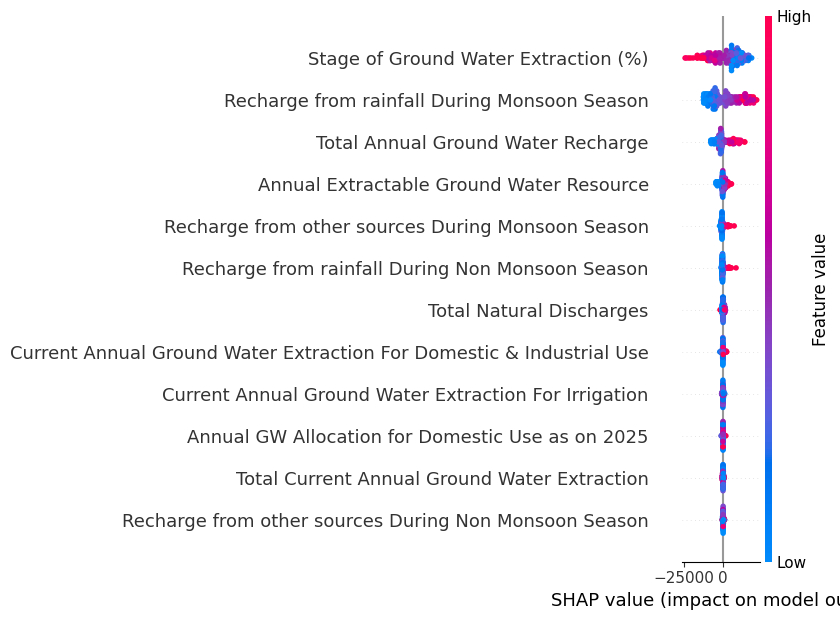

In [47]:
print("Variable Importance Plot - Global Interpretation")
figure = plt.figure()
shap.summary_plot(shap_values, X_test)

## **Gradient Boosting Regressor**

R2 Score: 0.88
Mean Squared Error (MSE): 64459887.24
Mean Absolute Error (MAE): 4068.56
Root Mean Squared Error (RMSE): 8028.69
Mean Absolute Percentage Error (MAPE): inf%


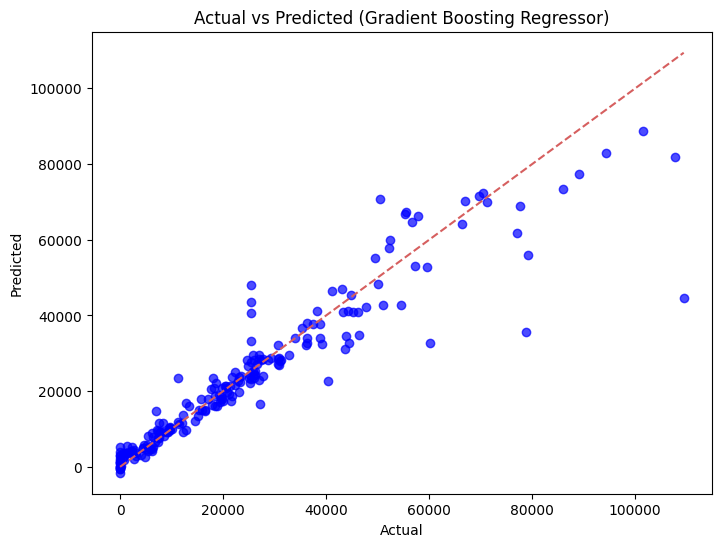

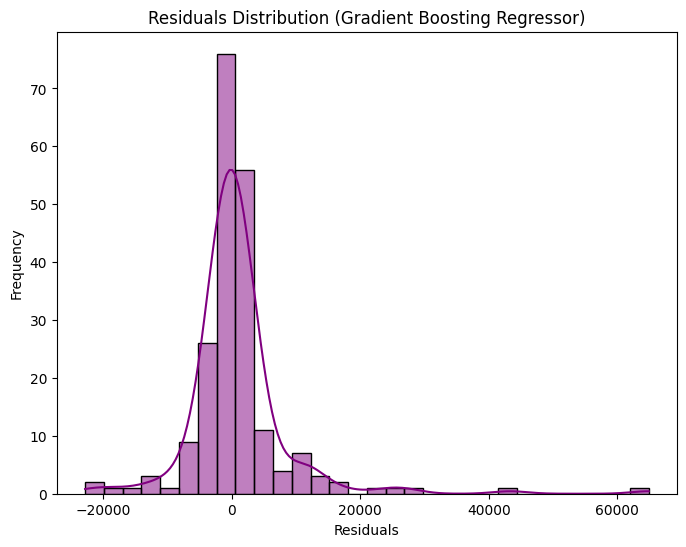

C:\Users\0513\AppData\Local\Temp\ipykernel_18148\403593144.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_gbr, palette='viridis')


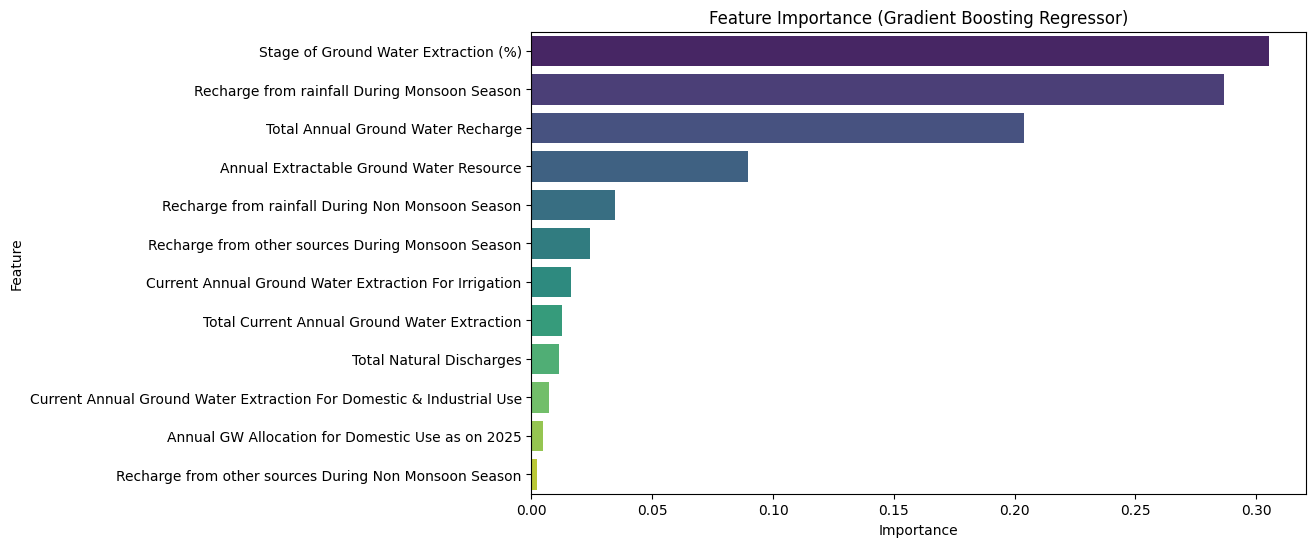

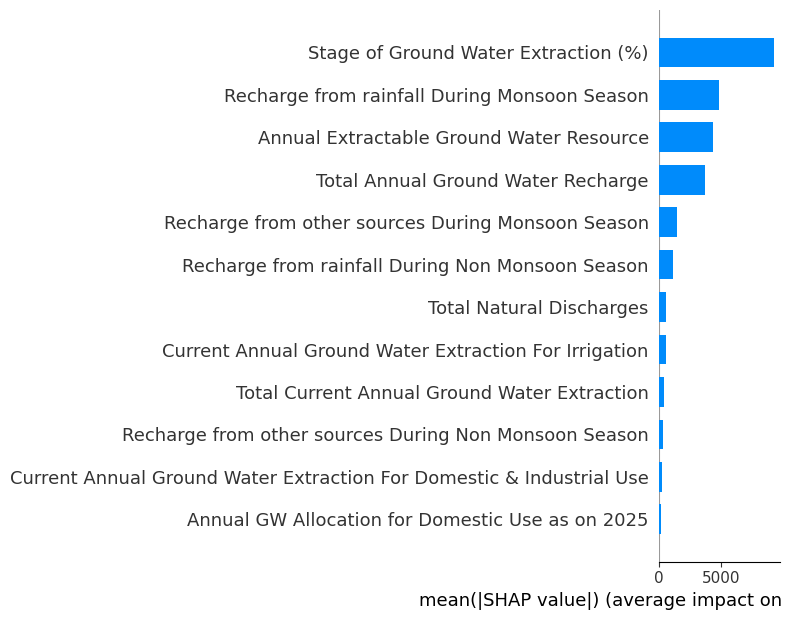

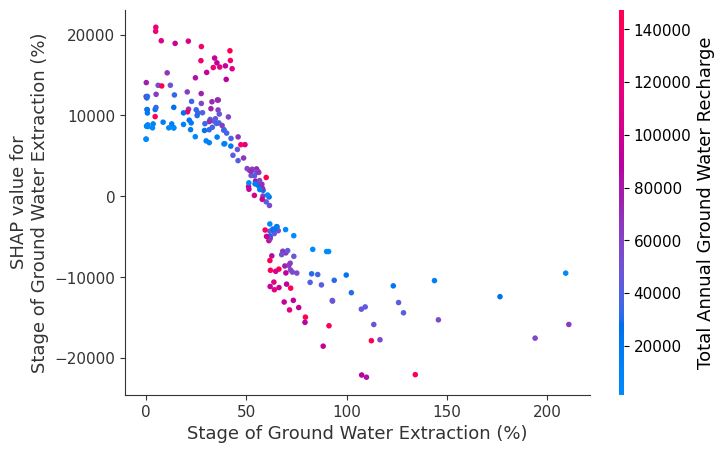

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Predicting on test data
y_pred_gbr = gbr_model.predict(X_test)

r2_gbr = r2_score(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
mape_gbr = np.mean(np.abs((y_test - y_pred_gbr) / y_test)) * 100

print(f"R2 Score: {r2_gbr:.2f}")
print(f"Mean Squared Error (MSE): {mse_gbr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_gbr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbr:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_gbr:.2f}%")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Gradient Boosting Regressor)")
plt.show()

residuals_gbr = y_test - y_pred_gbr
plt.figure(figsize=(8, 6))
sns.histplot(residuals_gbr, kde=True, bins=30, color="purple")
plt.title("Residuals Distribution (Gradient Boosting Regressor)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

feature_importances_gbr = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gbr_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_gbr, palette='viridis')
plt.title("Feature Importance (Gradient Boosting Regressor)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

explainer_shap_gbr = shap.Explainer(gbr_model, X_train)
shap_values_gbr = explainer_shap_gbr(X_test)

shap.summary_plot(shap_values_gbr, X_test, plot_type="bar")

most_important_feature_gbr = feature_importances_gbr['Feature'].iloc[0]
shap.dependence_plot(most_important_feature_gbr, shap_values_gbr.values, X_test)

# LIME Implementation 
lime_explainer_gbr = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode="regression",
    verbose=True
)




## **Linear Regression**

R2 Score: 0.79
Mean Squared Error (MSE): 110808356.66
Mean Absolute Error (MAE): 6570.06
Root Mean Squared Error (RMSE): 10526.55
Mean Absolute Percentage Error (MAPE): inf%


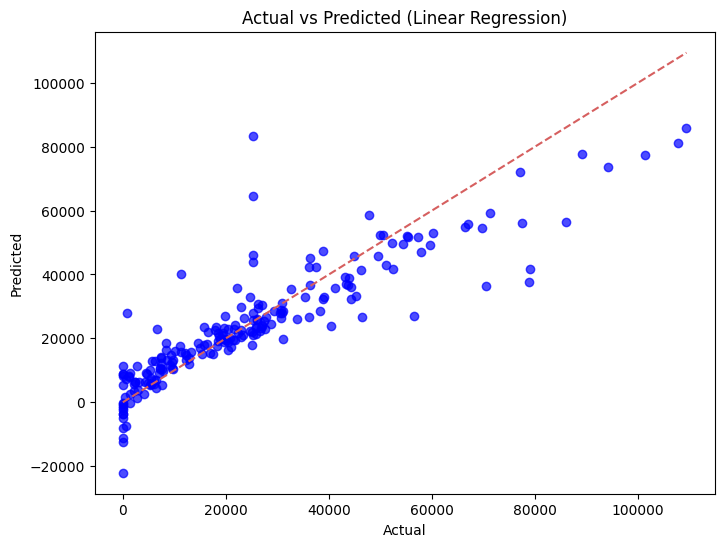

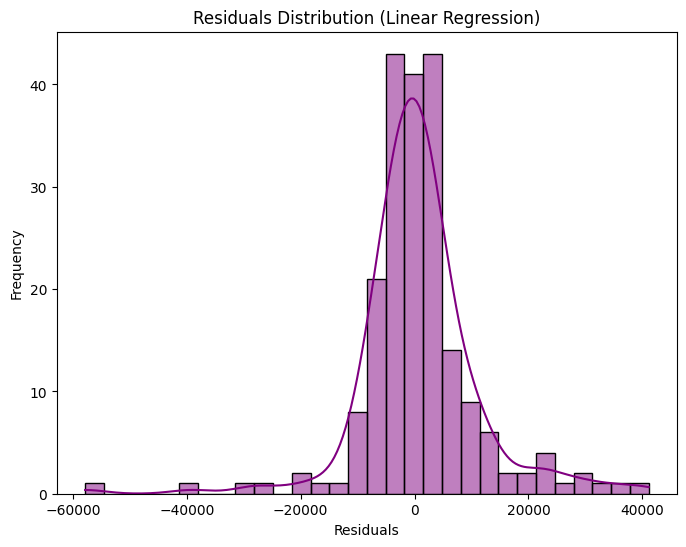

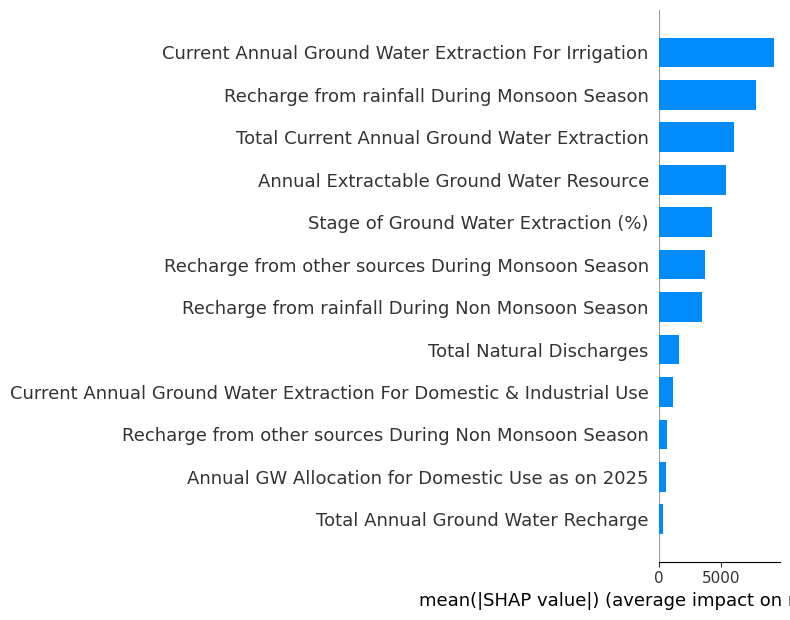

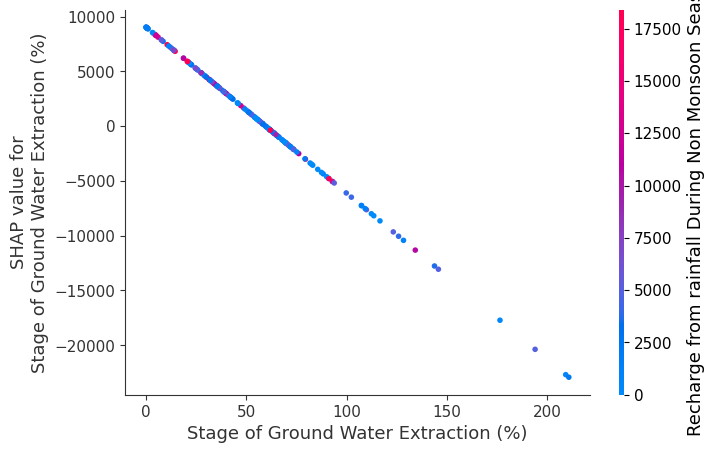

In [56]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from lime.lime_tabular import LimeTabularExplainer

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluation Metrics
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

print(f"R2 Score: {r2_lr:.2f}")
print(f"Mean Squared Error (MSE): {mse_lr:.2f}")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lr:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_lr:.2f}%")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(8, 6))
sns.histplot(residuals_lr, kde=True, bins=30, color="purple")
plt.title("Residuals Distribution (Linear Regression)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# SHAP Implementation 
explainer_shap_lr = shap.Explainer(lr_model, X_train)
shap_values_lr = explainer_shap_lr(X_test)

shap.summary_plot(shap_values_lr, X_test, plot_type="bar")

most_important_feature_lr = X_train.columns[np.argmax(np.abs(lr_model.coef_))]
shap.dependence_plot(most_important_feature_lr, shap_values_lr.values, X_test)

# LIME Implementation 
lime_explainer_lr = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    mode="regression",
    verbose=True
)




# **Model Comparison**

C:\Users\0513\AppData\Local\Temp\ipykernel_18148\830352542.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=comparison_df, palette='viridis')
C:\Users\0513\AppData\Local\Temp\ipykernel_18148\830352542.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=comparison_df, palette='viridis')
C:\Users\0513\AppData\Local\Temp\ipykernel_18148\830352542.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=comparison_df, palette='viridis')
C:\Users\0513\AppData\Local\T

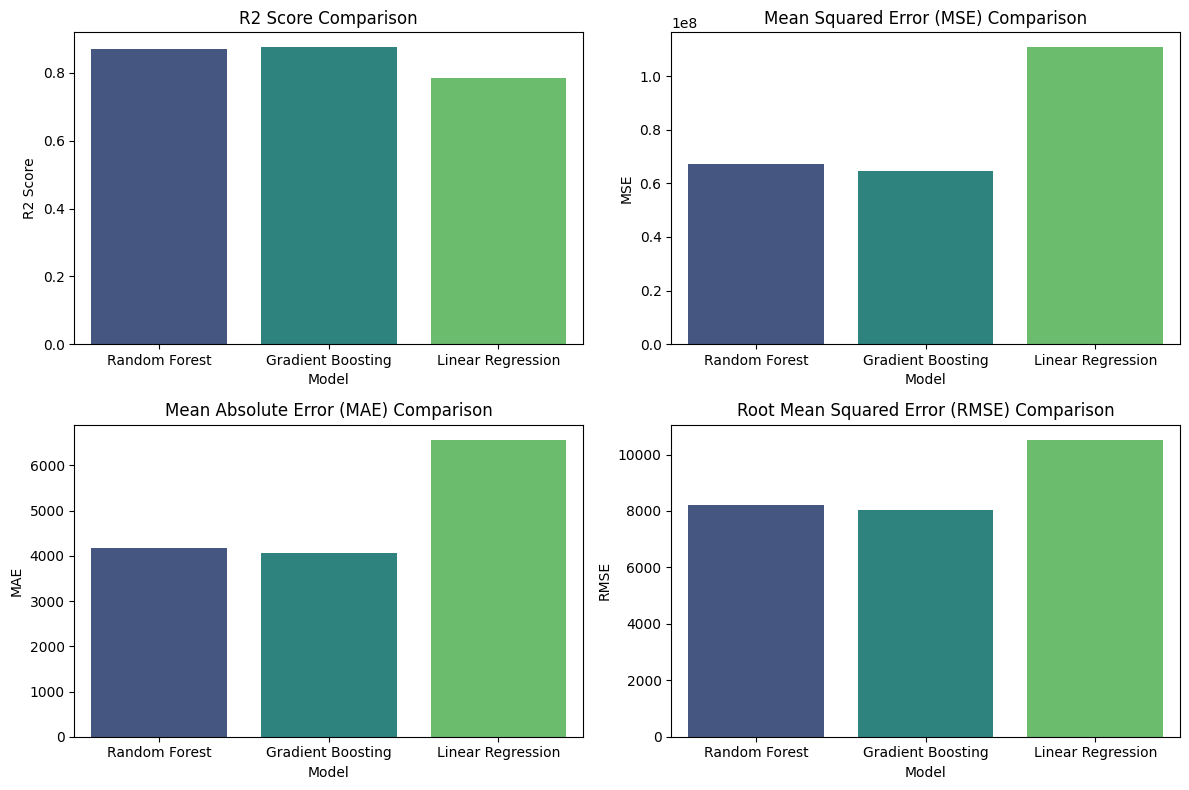

In [57]:
models = ['Random Forest', 'Gradient Boosting', 'Linear Regression']
r2_scores = [r2, r2_gbr, r2_lr]
mse_scores = [mse, mse_gbr, mse_lr]
mae_scores = [mae, mae_gbr, mae_lr]
rmse_scores = [rmse, rmse_gbr, rmse_lr]

# comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': models,
    'R2 Score': r2_scores,
    'MSE': mse_scores,
    'MAE': mae_scores,
    'RMSE': rmse_scores
})

plt.figure(figsize=(12, 8))

# R2 Score Comparison
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='R2 Score', data=comparison_df, palette='viridis')
plt.title('R2 Score Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')

# MSE Comparison
plt.subplot(2, 2, 2)
sns.barplot(x='Model', y='MSE', data=comparison_df, palette='viridis')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Model')
plt.ylabel('MSE')

# MAE Comparison
plt.subplot(2, 2, 3)
sns.barplot(x='Model', y='MAE', data=comparison_df, palette='viridis')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')

# RMSE Comparison
plt.subplot(2, 2, 4)
sns.barplot(x='Model', y='RMSE', data=comparison_df, palette='viridis')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()
